In [1]:
import sys
sys.path.insert(0, '../src')
import pandas as pd
import numpy as np
import roboscientist.equation.equation as rs_equation
from experiments import run_experiment

import roboscientist.equation.operators as rs_operators
from scipy.special import lambertw


import matplotlib.pyplot as plt

In [2]:
Data=pd.read_pickle('S_S_data_for_simbolic.pkl')
Data= pd.DataFrame(Data)
Data

,distance,dx,dy,dz,formE
6141d01851c1cbd9654b8890,3.124591,0.000000,0.000000,-3.124591e+00,2.639464
6141d06451c1cbd9654b8892,3.190316,22.332210,0.000000,-1.332268e-15,2.636693
6141cf6d51c1cbd9654b8882,4.465555,1.595158,2.762894,-3.124591e+00,2.693197
6141d0e151c1cbd9654b8894,5.525789,4.785474,2.762894,0.000000e+00,2.654705
6141cf0f51c1cbd9654b8870,6.348024,4.785474,2.762894,-3.124591e+00,2.653139
6141cf1651c1cbd9654b8876,6.380631,22.332210,5.525789,-4.440892e-16,2.669060
6141d00951c1cbd9654b888e,7.104613,3.190316,5.525789,-3.124591e+00,2.657065
6141cf3451c1cbd9654b887e,8.440782,11.166105,13.814472,8.881784e-16,2.656502
6141cf2d51c1cbd9654b887c,9.000548,6.380631,5.525789,-3.124591e+00,2.659103
6141cf1351c1cbd9654b8874,9.570947,7.975789,13.814472,-1.776357e-15,2.664542


In [6]:
Z

array([[-3.12459084e+00],
       [-1.33226763e-15],
       [-3.12459084e+00],
       [ 0.00000000e+00],
       [-3.12459084e+00],
       [-4.44089210e-16],
       [-3.12459084e+00],
       [ 8.88178420e-16],
       [-3.12459084e+00],
       [-1.77635684e-15],
       [-3.12459084e+00],
       [-1.77635684e-15],
       [-3.12459084e+00],
       [ 0.00000000e+00],
       [-3.12459084e+00],
       [-8.88178420e-16],
       [-3.12459084e+00],
       [ 0.00000000e+00],
       [-3.12459084e+00]])

In [35]:
Data_for_sibolic = Data.to_numpy()

X = np.array([Data_for_sibolic[var][0].tolist() for var in range(Data_for_sibolic.shape[0])]).reshape(-1,1)

y = Data_for_sibolic[:,4]

Z=np.array([Data_for_sibolic[var][3].tolist() for var in range(Data_for_sibolic.shape[0])]).reshape(-1,1)



#for i in range(Z.shape[0]):
#    np.append(X[i],Z[i])

#Dataset=np.append(X,Z,axis=1)
Dataset=X
Dy = y
Dataset


#Xl1=Dataset[abs(Z)>1]
#Xl2=Dataset[abs(Z)<1]



array([[ 3.12459084],
       [ 3.1903157 ],
       [ 4.46555508],
       [ 5.52578888],
       [ 6.34802416],
       [ 6.3806314 ],
       [ 7.10461294],
       [ 8.44078195],
       [ 9.00054819],
       [ 9.5709471 ],
       [10.06807312],
       [11.05157777],
       [11.48479164],
       [11.50284684],
       [11.91967086],
       [12.7612628 ],
       [13.13822272],
       [13.90626373],
       [14.25297299]])

In [17]:
Dy[abs(Z.reshape(-1))>1]

array([2.6394637 , 2.69319688, 2.65313929, 2.65706509, 2.65910306,
       2.66048484, 2.66250016, 2.66321158, 2.66360764, 2.66378208])

In [36]:
Dataset=Dataset[abs(Z)<1]
Dy = Dy[abs(Z.reshape(-1))<1]
Dataset

array([ 3.1903157 ,  5.52578888,  6.3806314 ,  8.44078195,  9.5709471 ,
       11.05157777, 11.50284684, 12.7612628 , 13.90626373])

In [23]:
Dataset.min(axis=0)

3.1245908399999998

In [37]:
Dataset=np.array(Dataset)
Dy=np.array(Dy)
Dy=Dy - max(Dy)
Dy

array([-0.03236636, -0.01435505,  0.        , -0.01255767, -0.00451737,
       -0.00666843, -0.00779723, -0.00553224, -0.00730809])

In [38]:
x_lows = [Dataset.min(axis=0)]
x_highs = [Dataset.max(axis=0)]
y_dom = (Dy.min()-0.005, Dy.max()+0.005)
domains_grid = (x_lows, x_highs, y_dom)

print(x_lows, x_highs, y_dom)

Dataset.reshape(-1,1)

[3.1903156999999993] [13.906263734291226] (-0.03736635500002194, 0.005)


array([[ 3.1903157 ],
       [ 5.52578888],
       [ 6.3806314 ],
       [ 8.44078195],
       [ 9.5709471 ],
       [11.05157777],
       [11.50284684],
       [12.7612628 ],
       [13.90626373]])

In [39]:
Dataset=Dataset.reshape(-1,1)

In [21]:
x_lows = [Dataset.min(axis=0)[var_idx] for var_idx in range(Dataset.shape[-1])]
x_highs = [Dataset.max(axis=0)[var_idx] for var_idx in range(Dataset.shape[-1])]
y_dom = (Dy.min()-0.01, Dy.max()+0.01)
domains_grid = (x_lows, x_highs, y_dom)

print(x_lows, x_highs, y_dom)

IndexError: invalid index to scalar variable.

In [42]:
def get_sub_trees_of_binary(list_of_tokens, idx):
    if list_of_tokens[idx] in rs_operators.OPERATORS:
        open_nodes = rs_operators.OPERATORS[list_of_tokens[idx]].arity
    else:
        open_nodes = 0
    left, right = [], []
    current_sub_tree = left
    for i, token in enumerate(list_of_tokens[idx + 1:]):
        if open_nodes == 0:
            break
        if open_nodes == 1:
            current_sub_tree = right
        current_sub_tree.append(token)

        if token in rs_operators.OPERATORS:
            operator = rs_operators.OPERATORS[token]
            open_nodes += operator.arity - 1
        else:
            open_nodes -= 1
    return left, right

def get_offsprings(list_of_tokens, idx):
    if list_of_tokens[idx] in rs_operators.OPERATORS:
        open_nodes = rs_operators.OPERATORS[list_of_tokens[idx]].arity
    else:
        open_nodes = 0
    traversal = []
    for i, token in enumerate(list_of_tokens[idx + 1:]):
        if open_nodes == 0:
            break
        traversal.append(token)
        if token in rs_operators.OPERATORS:
            operator = rs_operators.OPERATORS[token]
            open_nodes += operator.arity - 1
        else:
            open_nodes -= 1

    return traversal

def predicate(list_of_tokens, chek = False):

        
#    if list_of_tokens[0] == 'add':
 #       left, right = get_sub_trees_of_binary(list_of_tokens, 0)
  #      if right not in rs_operators or left !='div':
   #             return False

  #if  'X**-2' not in list_of_tokens:
   #   return False
    
    if 'x1'  not in list_of_tokens :
        return False

#   if 'cos**2' not in list_of_tokens and 'sin**2' not in list_of_tokens and 'sin' not in list_of_tokens and 'cos' not in list_of_tokens :
#       return False
    
 #   if list_of_tokens[0] != 'add_oscil':
  #      return False

    for i, token in enumerate(list_of_tokens):
        offsprings = get_offsprings(list_of_tokens, i)      
        if  token == 'exp'  or token == 'pow2' or token == 'sin' or token == 'pow' or token == 'cos' :
            if  'exp' in offsprings or 'pow2' in offsprings or 'sin' in offsprings or 'pow' in offsprings or 'cos' in offsprings  :

                return False
           
            
            
    return True


In [43]:
solver = run_experiment(Dataset, Dy,
        functions=['add', 'sub', 'mul', 'div','pow2','cos','exp','pow'],
        #functions=list(rs_operators.OPERATORS.keys()),
        #free_variables=['x1','x2','x3','x4','x5','x6'],
        free_variables=['x1'],
        wandb_proj='SEGVAE2',
        project_name='SEGVAE2_S_S_l2',
        constants=[],
        float_constants=rs_operators.FLOAT_CONST + rs_operators.INT_CONST,
        #float_constants=None,
        epochs=600,
        n_formulas_to_sample=5000,
        max_formula_length=30,
        formula_predicate=predicate,
        true_formula=rs_equation.Equation(['5']),
        latent=128,
        lstm_hidden_dim=64,
        device='cuda',
        train_size=50000,
        log_intermediate_steps=True,
        domains=domains_grid,
        simplification=False,
        pretrain_path=None)

best_log_mean_mse_top_1,█▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_log_mean_mse_top_10,█▇▇▆▆▆▆▅▅▅▅▄▄▄▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_log_mean_mse_top_100,█▆▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_log_mean_mse_top_25,█▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_log_mean_mse_top_250,█▇▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_log_mean_mse_top_50,█▆▅▄▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_log_mean_mse_top_500,█▇▅▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_mean_mse_top_1,█▆▆▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_mean_mse_top_10,█▇▆▅▅▅▅▅▄▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_mean_mse_top_100,█▅▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_mean_mse_top_25,█▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


===== START PRETRAIN =====
	[training] batches count: 196
	[training] loss: 21.089, rec loss: 21.011, kl: 0.154
	[validation] loss: 18.166, rec loss: 18.151, kl: 0.029
	[training] batches count: 196
	[training] loss: 18.475, rec loss: 18.463, kl: 0.024
	[validation] loss: 17.009, rec loss: 17.003, kl: 0.013
	[training] batches count: 196
	[training] loss: 17.739, rec loss: 17.727, kl: 0.024
	[validation] loss: 16.663, rec loss: 16.647, kl: 0.032
	[training] batches count: 196
	[training] loss: 17.438, rec loss: 17.412, kl: 0.052
	[validation] loss: 16.476, rec loss: 16.443, kl: 0.066
	[training] batches count: 196
	[training] loss: 17.298, rec loss: 17.237, kl: 0.123
	[validation] loss: 16.363, rec loss: 16.279, kl: 0.167
	[training] batches count: 196
	[training] loss: 17.176, rec loss: 17.081, kl: 0.191
	[validation] loss: 16.224, rec loss: 16.123, kl: 0.201
	[training] batches count: 196
	[training] loss: 17.074, rec loss: 16.953, kl: 0.241
	[validation] loss: 16.098, rec loss: 15.9

	[training] batches count: 1
	[training] loss: 14.900, rec loss: 12.830, kl: 4.140
	[validation] loss: 14.862, rec loss: 12.895, kl: 3.933
	[training] batches count: 1
	[training] loss: 13.614, rec loss: 11.813, kl: 3.601
	[validation] loss: 13.325, rec loss: 11.601, kl: 3.447
	[training] batches count: 1
	[training] loss: 14.392, rec loss: 12.588, kl: 3.609
	[validation] loss: 13.672, rec loss: 11.937, kl: 3.470
	[training] batches count: 1
	[training] loss: 14.175, rec loss: 12.492, kl: 3.365
	[validation] loss: 13.277, rec loss: 11.637, kl: 3.279
	[training] batches count: 1
	[training] loss: 14.059, rec loss: 12.444, kl: 3.229
	[validation] loss: 13.624, rec loss: 12.009, kl: 3.230
	[training] batches count: 1
	[training] loss: 15.452, rec loss: 13.737, kl: 3.432
	[validation] loss: 15.038, rec loss: 13.291, kl: 3.494
	[training] batches count: 1
	[training] loss: 14.695, rec loss: 12.973, kl: 3.444
	[validation] loss: 14.488, rec loss: 12.826, kl: 3.324
	[training] batches count: 

	[training] batches count: 1
	[training] loss: 6.642, rec loss: 5.732, kl: 1.820
	[validation] loss: 6.822, rec loss: 5.913, kl: 1.817
	[training] batches count: 1
	[training] loss: 7.542, rec loss: 6.645, kl: 1.792
	[validation] loss: 6.630, rec loss: 5.727, kl: 1.805
	[training] batches count: 1
	[training] loss: 6.995, rec loss: 6.098, kl: 1.794
	[validation] loss: 6.522, rec loss: 5.593, kl: 1.857
	[training] batches count: 1
	[training] loss: 6.840, rec loss: 5.893, kl: 1.893
	[validation] loss: 6.745, rec loss: 5.810, kl: 1.871
	[training] batches count: 1
	[training] loss: 8.540, rec loss: 7.550, kl: 1.979
	[validation] loss: 8.273, rec loss: 7.296, kl: 1.954
	[training] batches count: 1
	[training] loss: 8.622, rec loss: 7.634, kl: 1.976
	[validation] loss: 8.562, rec loss: 7.573, kl: 1.977
	[training] batches count: 1
	[training] loss: 9.581, rec loss: 8.522, kl: 2.117
	[validation] loss: 9.417, rec loss: 8.364, kl: 2.106
	[training] batches count: 1
	[training] loss: 9.327, r

	[training] batches count: 1
	[training] loss: 6.728, rec loss: 5.837, kl: 1.783
	[validation] loss: 6.716, rec loss: 5.848, kl: 1.737
	[training] batches count: 1
	[training] loss: 6.968, rec loss: 6.108, kl: 1.721
	[validation] loss: 6.839, rec loss: 5.980, kl: 1.718
	[training] batches count: 1
	[training] loss: 6.868, rec loss: 5.974, kl: 1.788
	[validation] loss: 6.610, rec loss: 5.710, kl: 1.800
	[training] batches count: 1
	[training] loss: 7.044, rec loss: 6.144, kl: 1.799
	[validation] loss: 6.600, rec loss: 5.674, kl: 1.852
	[training] batches count: 1
	[training] loss: 6.779, rec loss: 5.865, kl: 1.829
	[validation] loss: 6.414, rec loss: 5.493, kl: 1.843
	[training] batches count: 1
	[training] loss: 7.469, rec loss: 6.537, kl: 1.864
	[validation] loss: 7.184, rec loss: 6.252, kl: 1.863
	[training] batches count: 1
	[training] loss: 7.170, rec loss: 6.252, kl: 1.836
	[validation] loss: 6.753, rec loss: 5.803, kl: 1.900
	[training] batches count: 1
	[training] loss: 7.339, r

	[training] batches count: 1
	[training] loss: 9.667, rec loss: 8.612, kl: 2.110
	[validation] loss: 9.222, rec loss: 8.167, kl: 2.110
	[training] batches count: 1
	[training] loss: 10.338, rec loss: 9.271, kl: 2.133
	[validation] loss: 9.796, rec loss: 8.719, kl: 2.155
	[training] batches count: 1
	[training] loss: 10.153, rec loss: 9.058, kl: 2.191
	[validation] loss: 9.891, rec loss: 8.805, kl: 2.171
	[training] batches count: 1
	[training] loss: 11.125, rec loss: 10.026, kl: 2.199
	[validation] loss: 10.406, rec loss: 9.301, kl: 2.210
	[training] batches count: 1
	[training] loss: 10.727, rec loss: 9.678, kl: 2.098
	[validation] loss: 10.110, rec loss: 9.061, kl: 2.098
	[training] batches count: 1
	[training] loss: 11.026, rec loss: 9.931, kl: 2.191
	[validation] loss: 10.607, rec loss: 9.514, kl: 2.186
	[training] batches count: 1
	[training] loss: 11.097, rec loss: 10.003, kl: 2.188
	[validation] loss: 10.419, rec loss: 9.344, kl: 2.151
	[training] batches count: 1
	[training] lo

	[training] batches count: 1
	[training] loss: 9.971, rec loss: 9.068, kl: 1.806
	[validation] loss: 9.539, rec loss: 8.635, kl: 1.810
	[training] batches count: 1
	[training] loss: 9.691, rec loss: 8.804, kl: 1.774
	[validation] loss: 9.219, rec loss: 8.334, kl: 1.771
	[training] batches count: 1
	[training] loss: 10.546, rec loss: 9.633, kl: 1.826
	[validation] loss: 9.760, rec loss: 8.881, kl: 1.759
	[training] batches count: 1
	[training] loss: 10.142, rec loss: 9.280, kl: 1.723
	[validation] loss: 9.324, rec loss: 8.475, kl: 1.698
	[training] batches count: 1
	[training] loss: 10.410, rec loss: 9.577, kl: 1.668
	[validation] loss: 9.687, rec loss: 8.875, kl: 1.623
	[training] batches count: 1
	[training] loss: 10.052, rec loss: 9.248, kl: 1.608
	[validation] loss: 9.428, rec loss: 8.631, kl: 1.594
	[training] batches count: 1
	[training] loss: 9.793, rec loss: 8.980, kl: 1.626
	[validation] loss: 9.153, rec loss: 8.293, kl: 1.721
	[training] batches count: 1
	[training] loss: 9.42

[[ 1.569635  0.906229  1.562295]
 [ 0.025523  3.669124 -1.562295]
 [ 1.569635  4.61956   1.562295]
 [ 1.569635  6.432018  1.562295]
 [ 6.406154  3.669124  1.562295]
 [17.521214  0.906229 -1.562295]
 [ 8.001312  4.61956   1.562295]
 [ 9.59647  12.908243  1.562295]
 [11.140582 11.957807 -1.562295]
 [14.381943  0.906229  1.562295]
 [11.140582  4.61956   1.562295]]


In [2]:


#plt.plot(X[0],y)

[[ 2.392859  1.      ]
 [ 3.987968 -1.      ]
 [ 5.122973  1.      ]
 [ 6.802601  1.      ]
 [ 7.545995  1.      ]
 [ 8.202622 -1.      ]
 [ 9.370277  1.      ]
 [ 9.849015  1.      ]
 [10.392087 -1.      ]
 [11.286035  1.      ]
 [12.161154  1.      ]]


array([3.899692, 4.848482, 4.637509, 4.888823, 4.871396, 4.866795,
       4.894397, 4.883973, 4.882728, 4.885172, 4.895091])

[[20.749813  4.597456  3.719751 22.319449  3.691227  2.157456]
 [ 9.583708  7.360351  3.719751  9.558186  3.691227  5.282046]
 [ 7.988551  4.597456  3.719751  9.558186  9.217016  2.157456]
 [ 1.607919 15.649034  3.719751  3.177554  9.217016  2.157456]
 [11.178866 21.174823  3.719751  4.772712 17.505699  2.157456]
 [ 1.607919 10.123245  3.719751 19.129133  9.217016  5.282046]
 [ 9.583708  1.834562  3.719751  1.582397  6.454121  2.157456]
 [15.96434   1.834562  3.719751  6.36787  14.742805  2.157456]
 [ 1.607919 21.174823  3.719751 12.748502  9.217016  5.282046]
 [17.559498  4.597456  3.719751  3.177554  3.691227  2.157456]
 [ 3.203077 12.88614   3.719751 14.343659 17.505699  2.157456]]


11

In [3]:
Dataset=X
Dy = y
for i in range (4):
    j=i+1
    def get_noise(ar):
        return np.random.normal(ar,0.003 * j * np.abs(ar))
    
    
    D=np.apply_along_axis(get_noise, 0, X)

    Dataset = np.concatenate((Dataset, D), axis=0)
    
    Dy= np.append(Dy, y)
    
print(Dataset)
print(Dy)

[[ 2.392859    1.        ]
 [ 3.987968   -1.        ]
 [ 5.122973    1.        ]
 [ 6.802601    1.        ]
 [ 7.545995    1.        ]
 [ 8.202622   -1.        ]
 [ 9.370277    1.        ]
 [ 9.849015    1.        ]
 [10.392087   -1.        ]
 [11.286035    1.        ]
 [12.161154    1.        ]
 [ 2.40574714  1.00278958]
 [ 3.97174461 -0.9986743 ]
 [ 5.12906613  1.00053986]
 [ 6.78283711  1.00175827]
 [ 7.50390755  0.99952044]
 [ 8.20789045 -1.00181463]
 [ 9.37331973  0.99823131]
 [ 9.87443954  1.00414558]
 [10.4370459  -0.99832752]
 [11.28786702  0.99783215]
 [12.13195084  0.99695462]
 [ 2.40815438  0.98233059]
 [ 3.9769552  -0.99934238]
 [ 5.10900186  0.99920204]
 [ 6.84669272  0.99453896]
 [ 7.623452    1.00052031]
 [ 8.13294792 -0.99840476]
 [ 9.33174755  1.0067143 ]
 [ 9.74481897  0.99315286]
 [10.41819674 -1.00740918]
 [11.23568205  0.99576338]
 [12.26307715  0.99674419]
 [ 2.42276393  1.0054118 ]
 [ 3.97522027 -0.99891592]
 [ 5.0691521   1.01729285]
 [ 6.75426783  1.00244622]
 

In [ ]:
from collections import defaultdict
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib.cm as cm
#import pickle5 as pickle
import pymatgen
import gzip

%config InlineBackend.figure_format='retina'

In [ ]:
structures = pd.read_pickle('../datasets/processed/dichalcogenides_x1s6_202109_MoS2/data.pickle.gz')

In [ ]:
structures

In [3]:
def get_sub_trees_of_binary(list_of_tokens, idx):
    if list_of_tokens[idx] in rs_operators.OPERATORS:
        open_nodes = rs_operators.OPERATORS[list_of_tokens[idx]].arity
    else:
        open_nodes = 0
    left, right = [], []
    current_sub_tree = left
    for i, token in enumerate(list_of_tokens[idx + 1:]):
        if open_nodes == 0:
            break
        if open_nodes == 1:
            current_sub_tree = right
        current_sub_tree.append(token)

        if token in rs_operators.OPERATORS:
            operator = rs_operators.OPERATORS[token]
            open_nodes += operator.arity - 1
        else:
            open_nodes -= 1
    return left, right


In [4]:
def get_offsprings(list_of_tokens, idx):
    if list_of_tokens[idx] in rs_operators.OPERATORS:
        open_nodes = rs_operators.OPERATORS[list_of_tokens[idx]].arity
    else:
        open_nodes = 0
    traversal = []
    for i, token in enumerate(list_of_tokens[idx + 1:]):
        if open_nodes == 0:
            break
        traversal.append(token)
        if token in rs_operators.OPERATORS:
            operator = rs_operators.OPERATORS[token]
            open_nodes += operator.arity - 1
        else:
            open_nodes -= 1

    return traversal

def predicate(list_of_tokens, chek = False):

        
#    if list_of_tokens[0] == 'add':
 #       left, right = get_sub_trees_of_binary(list_of_tokens, 0)
  #      if right not in rs_operators or left !='div':
   #             return False

  #if  'X**-2' not in list_of_tokens:
   #   return False
    
    if 'x1'  not in list_of_tokens or 'x2' not in list_of_tokens :
        return False

#   if 'cos**2' not in list_of_tokens and 'sin**2' not in list_of_tokens and 'sin' not in list_of_tokens and 'cos' not in list_of_tokens :
#       return False
    
 #   if list_of_tokens[0] != 'add_oscil':
  #      return False

    for i, token in enumerate(list_of_tokens):
        offsprings = get_offsprings(list_of_tokens, i)      
        if  token == 'exp' or token == 'log' or token == 'pow' :
            if  'exp' in offsprings or 'log' in offsprings or 'pow' in offsprings :
                return False
         
            
    return True


In [5]:
Dataset=np.array(Dataset)
Dy=np.array(Dy)

In [17]:
Dataset

array([[ 2.392859  ,  1.        ],
       [ 3.987968  , -1.        ],
       [ 5.122973  ,  1.        ],
       [ 6.802601  ,  1.        ],
       [ 7.545995  ,  1.        ],
       [ 8.202622  , -1.        ],
       [ 9.370277  ,  1.        ],
       [ 9.849015  ,  1.        ],
       [10.392087  , -1.        ],
       [11.286035  ,  1.        ],
       [12.161154  ,  1.        ],
       [ 2.39761988,  0.99521063],
       [ 3.99033814, -0.9984969 ],
       [ 5.14048572,  0.99890756],
       [ 6.81462631,  1.00171188],
       [ 7.51449058,  1.00260318],
       [ 8.19860422, -0.99899777],
       [ 9.3952738 ,  1.00099461],
       [ 9.86113621,  1.00404117],
       [10.3685101 , -1.00006159],
       [11.2865953 ,  0.99874662],
       [12.21840087,  1.00021112],
       [ 2.39660284,  0.99988714],
       [ 3.98712043, -0.99767245],
       [ 5.11601935,  1.00246442],
       [ 6.78860787,  1.00512806],
       [ 7.53470893,  0.99676131],
       [ 8.17829126, -1.00280459],
       [ 9.30436804,

In [6]:
x_lows = [Dataset.min(axis=0)[var_idx] for var_idx in range(Dataset.shape[-1])]
x_highs = [Dataset.max(axis=0)[var_idx] for var_idx in range(Dataset.shape[-1])]
y_dom = (Dy.min(), Dy.max())
domains_grid = (x_lows, x_highs, y_dom)

print(x_lows, x_highs, y_dom)

[2.392859, -1.0074091778050196] [12.432960508620573, 1.0172928477066736] (3.899692, 4.895091)


In [7]:
solver = run_experiment(Dataset, Dy,
        functions=['add', 'sub', 'mul', 'div','pow2','pow'],
        #functions=list(rs_operators.OPERATORS.keys()),
        #free_variables=['x1','x2','x3','x4','x5','x6'],
        free_variables=['x1','x2'],
        wandb_proj='SEGVAE2',
        project_name='SEGVAE2_sympy_,MoS2_Z2_pow2_2d',
        constants=[],
        float_constants=rs_operators.FLOAT_CONST + rs_operators.INT_CONST,
        #float_constants=None,
        epochs=2000,
        n_formulas_to_sample=5000,
        max_formula_length=25,
        formula_predicate=predicate,
        true_formula=rs_equation.Equation(['5']),
        latent=128,
        lstm_hidden_dim=64,
        device='cuda',
        train_size=50000,
        log_intermediate_steps=True,
        domains=domains_grid,
        simplification=True,
        pretrain_path=None)

wandb: Currently logged in as: mikelazarev (use `wandb login --relogin` to force relogin)


===== START PRETRAIN =====
	[training] batches count: 196
	[training] loss: 31.039, rec loss: 30.945, kl: 0.188
	[validation] loss: 27.723, rec loss: 27.714, kl: 0.017
	[training] batches count: 196
	[training] loss: 27.902, rec loss: 27.891, kl: 0.023
	[validation] loss: 26.546, rec loss: 26.540, kl: 0.011
	[training] batches count: 196
	[training] loss: 27.196, rec loss: 27.187, kl: 0.017
	[validation] loss: 26.168, rec loss: 26.161, kl: 0.013
	[training] batches count: 196
	[training] loss: 26.921, rec loss: 26.912, kl: 0.018
	[validation] loss: 26.038, rec loss: 26.029, kl: 0.018
	[training] batches count: 196
	[training] loss: 26.799, rec loss: 26.785, kl: 0.027
	[validation] loss: 26.005, rec loss: 25.988, kl: 0.036
	[training] batches count: 196
	[training] loss: 26.716, rec loss: 26.687, kl: 0.058
	[validation] loss: 25.891, rec loss: 25.850, kl: 0.082
	[training] batches count: 196
	[training] loss: 26.655, rec loss: 26.595, kl: 0.120
	[validation] loss: 25.814, rec loss: 25.7

/home/mikhail/anaconda3/envs/SEGVAE2/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mikhail/anaconda3/envs/SEGVAE2/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


	[training] batches count: 1
	[training] loss: 51.655, rec loss: 48.323, kl: 6.664
	[validation] loss: 34.073, rec loss: 29.847, kl: 8.451
	[training] batches count: 1
	[training] loss: 29.849, rec loss: 26.099, kl: 7.501
	[validation] loss: 30.988, rec loss: 27.185, kl: 7.605
	[training] batches count: 1
	[training] loss: 30.416, rec loss: 26.676, kl: 7.481
	[validation] loss: 28.615, rec loss: 25.346, kl: 6.537
	[training] batches count: 1
	[training] loss: 25.783, rec loss: 22.254, kl: 7.057
	[validation] loss: 23.426, rec loss: 20.875, kl: 5.101
	[training] batches count: 1
	[training] loss: 34.136, rec loss: 31.634, kl: 5.004
	[validation] loss: 25.868, rec loss: 23.549, kl: 4.638
	[training] batches count: 1
	[training] loss: 22.531, rec loss: 20.257, kl: 4.547
	[validation] loss: 23.091, rec loss: 20.997, kl: 4.187
	[training] batches count: 1
	[training] loss: 17.439, rec loss: 15.348, kl: 4.181
	[validation] loss: 21.907, rec loss: 19.899, kl: 4.016
	[training] batches count: 

	[training] batches count: 1
	[training] loss: 12.382, rec loss: 11.369, kl: 2.026
	[validation] loss: 11.311, rec loss: 10.328, kl: 1.966
	[training] batches count: 1
	[training] loss: 14.400, rec loss: 13.457, kl: 1.887
	[validation] loss: 13.608, rec loss: 12.662, kl: 1.892
	[training] batches count: 1
	[training] loss: 18.220, rec loss: 17.224, kl: 1.992
	[validation] loss: 15.788, rec loss: 14.760, kl: 2.055
	[training] batches count: 1
	[training] loss: 18.709, rec loss: 17.725, kl: 1.967
	[validation] loss: 19.902, rec loss: 18.895, kl: 2.014
	[training] batches count: 1
	[training] loss: 18.336, rec loss: 17.337, kl: 1.997
	[validation] loss: 17.368, rec loss: 16.359, kl: 2.019
	[training] batches count: 1
	[training] loss: 18.628, rec loss: 17.626, kl: 2.004
	[validation] loss: 16.816, rec loss: 15.791, kl: 2.049
	[training] batches count: 1
	[training] loss: 20.731, rec loss: 19.548, kl: 2.366
	[validation] loss: 18.928, rec loss: 17.691, kl: 2.473
	[training] batches count: 

	[training] batches count: 1
	[training] loss: 11.066, rec loss: 10.239, kl: 1.653
	[validation] loss: 10.107, rec loss: 9.262, kl: 1.690
	[training] batches count: 1
	[training] loss: 11.305, rec loss: 10.443, kl: 1.723
	[validation] loss: 10.559, rec loss: 9.675, kl: 1.769
	[training] batches count: 1
	[training] loss: 10.982, rec loss: 10.051, kl: 1.862
	[validation] loss: 10.484, rec loss: 9.557, kl: 1.853
	[training] batches count: 1
	[training] loss: 11.809, rec loss: 10.843, kl: 1.932
	[validation] loss: 11.536, rec loss: 10.597, kl: 1.877
	[training] batches count: 1
	[training] loss: 12.956, rec loss: 12.004, kl: 1.905
	[validation] loss: 13.004, rec loss: 12.075, kl: 1.859
	[training] batches count: 1
	[training] loss: 14.960, rec loss: 14.018, kl: 1.884
	[validation] loss: 14.750, rec loss: 13.806, kl: 1.888
	[training] batches count: 1
	[training] loss: 16.014, rec loss: 15.088, kl: 1.851
	[validation] loss: 15.330, rec loss: 14.390, kl: 1.880
	[training] batches count: 1
	

	[training] batches count: 1
	[training] loss: 12.454, rec loss: 11.582, kl: 1.744
	[validation] loss: 11.833, rec loss: 10.955, kl: 1.757
	[training] batches count: 1
	[training] loss: 11.906, rec loss: 11.009, kl: 1.795
	[validation] loss: 11.917, rec loss: 11.021, kl: 1.791
	[training] batches count: 1
	[training] loss: 12.140, rec loss: 11.241, kl: 1.799
	[validation] loss: 11.923, rec loss: 11.031, kl: 1.785
	[training] batches count: 1
	[training] loss: 12.448, rec loss: 11.596, kl: 1.705
	[validation] loss: 12.031, rec loss: 11.177, kl: 1.708
	[training] batches count: 1
	[training] loss: 12.586, rec loss: 11.729, kl: 1.715
	[validation] loss: 11.978, rec loss: 11.117, kl: 1.722
	[training] batches count: 1
	[training] loss: 12.401, rec loss: 11.526, kl: 1.750
	[validation] loss: 11.983, rec loss: 11.099, kl: 1.768
	[training] batches count: 1
	[training] loss: 12.591, rec loss: 11.759, kl: 1.664
	[validation] loss: 12.134, rec loss: 11.296, kl: 1.677
	[training] batches count: 

	[training] batches count: 1
	[training] loss: 11.904, rec loss: 11.054, kl: 1.701
	[validation] loss: 11.571, rec loss: 10.726, kl: 1.690
	[training] batches count: 1
	[training] loss: 12.559, rec loss: 11.642, kl: 1.832
	[validation] loss: 11.781, rec loss: 10.864, kl: 1.834
	[training] batches count: 1
	[training] loss: 12.221, rec loss: 11.330, kl: 1.781
	[validation] loss: 11.650, rec loss: 10.773, kl: 1.753
	[training] batches count: 1
	[training] loss: 11.886, rec loss: 11.066, kl: 1.638
	[validation] loss: 11.532, rec loss: 10.717, kl: 1.629
	[training] batches count: 1
	[training] loss: 11.258, rec loss: 10.492, kl: 1.532
	[validation] loss: 10.907, rec loss: 10.149, kl: 1.515
	[training] batches count: 1
	[training] loss: 11.587, rec loss: 10.856, kl: 1.463
	[validation] loss: 11.030, rec loss: 10.290, kl: 1.480
	[training] batches count: 1
	[training] loss: 11.430, rec loss: 10.716, kl: 1.428
	[validation] loss: 10.907, rec loss: 10.185, kl: 1.445
	[training] batches count: 

	[training] batches count: 1
	[training] loss: 14.395, rec loss: 13.796, kl: 1.198
	[validation] loss: 13.968, rec loss: 13.356, kl: 1.226
	[training] batches count: 1
	[training] loss: 13.870, rec loss: 13.269, kl: 1.203
	[validation] loss: 12.992, rec loss: 12.354, kl: 1.275
	[training] batches count: 1
	[training] loss: 13.811, rec loss: 13.174, kl: 1.275
	[validation] loss: 13.289, rec loss: 12.636, kl: 1.307
	[training] batches count: 1
	[training] loss: 14.181, rec loss: 13.517, kl: 1.329
	[validation] loss: 13.815, rec loss: 13.167, kl: 1.297
	[training] batches count: 1
	[training] loss: 14.080, rec loss: 13.453, kl: 1.254
	[validation] loss: 13.085, rec loss: 12.464, kl: 1.241
	[training] batches count: 1
	[training] loss: 14.327, rec loss: 13.700, kl: 1.254
	[validation] loss: 13.726, rec loss: 13.111, kl: 1.231
	[training] batches count: 1
	[training] loss: 14.304, rec loss: 13.688, kl: 1.232
	[validation] loss: 13.587, rec loss: 12.976, kl: 1.223
	[training] batches count: 

KeyboardInterrupt: 

In [11]:
best_idx = np.argmin(solver.stats.last_n_best_mses)
equations = np.array(solver.stats.last_n_best_formulas)
eq = rs_equation.Equation(equations[best_idx].split())

print('Raw equation in prefix notation: ', equations[best_idx])
print('Equation in traditional notation: ', eq.repr())

Raw equation in prefix notation:  sub 5 div div add 4 div pow2 div pow2 div pow2 div add 4 x1 x1 x1 3 x1 3 x1
Equation in traditional notation:  (5 - (((4 + ((((((((4 + x1) / x1)^2) / x1)^2) / 3)^2) / x1)) / 3) / x1))


In [12]:
print('Raw equation in prefix notation: ', equations[best_idx])
print('Equation in traditional notation: ', eq.repr())

Raw equation in prefix notation:  sub 5 div div add 4 div pow2 div pow2 div pow2 div add 4 x1 x1 x1 3 x1 3 x1
Equation in traditional notation:  (5 - (((4 + ((((((((4 + x1) / x1)^2) / x1)^2) / 3)^2) / x1)) / 3) / x1))


Text(0.5, 1.0, 'V2_MoS2')

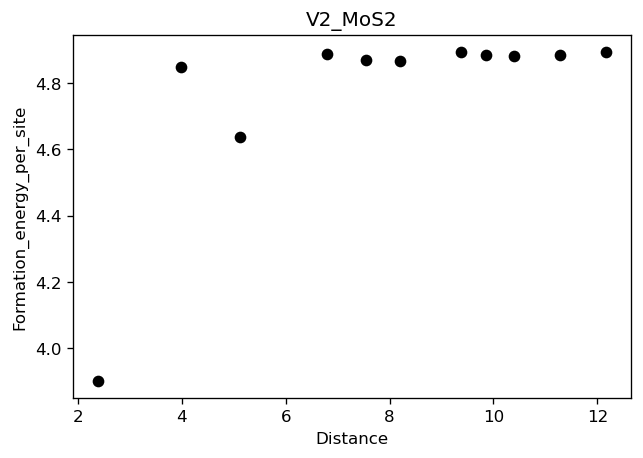

In [23]:

Data= np.array([
[2.392859, 1],
[3.987968, -1 ],
[5.122973, 1 ],
[6.802601, 1 ],
[7.545995, 1],
[8.202622, -1],
[9.370277, 1 ],
[9.849015, 1 ],
[10.392087, -1] ,
[11.286035 ,1 ],
[12.161154, 1 ]
])
y  = [
    3.899692,
    4.848482,
    4.637509,
    4.888823,
    4.871396,
    4.866795,
    4.894397,
    4.883973,
    4.882728,
    4.885172,
    4.895091


    ]

y=np.array(y)
#func = (1.0 / (Data[:,[1]] - Data[:,[0]])) + 5.0

fig, ax = plt.subplots(figsize=(6, 4), dpi=120)

plt.plot(Data[:,[0]],y, 'ko')

ax.set_ylabel('Formation_energy_per_site')

ax.set_xlabel('Distance')

ax.set_title('V2_MoS2')

In [15]:
import sympy as sp


r1,r2=sp.symbols('r1 r2')
expr=(((1 + 5) + (r1 / ((5 + r2)**2))) - 2)
sp.simplify(expr)

r1/(r2 + 5)**2 + 4

In [33]:
import matplotlib.pyplot as plt

[[ 2.3252628 ]
 [ 2.53724899]
 [ 2.74923517]
 [ 2.96122135]
 [ 3.17320754]
 [ 3.38519372]
 [ 3.5971799 ]
 [ 3.80916608]
 [ 4.02115227]
 [ 4.23313845]
 [ 4.44512463]
 [ 4.65711082]
 [ 4.869097  ]
 [ 5.08108318]
 [ 5.29306936]
 [ 5.50505555]
 [ 5.71704173]
 [ 5.92902791]
 [ 6.1410141 ]
 [ 6.35300028]
 [ 6.56498646]
 [ 6.77697264]
 [ 6.98895883]
 [ 7.20094501]
 [ 7.41293119]
 [ 7.62491738]
 [ 7.83690356]
 [ 8.04888974]
 [ 8.26087592]
 [ 8.47286211]
 [ 8.68484829]
 [ 8.89683447]
 [ 9.10882066]
 [ 9.32080684]
 [ 9.53279302]
 [ 9.7447792 ]
 [ 9.95676539]
 [10.16875157]
 [10.38073775]
 [10.59272394]
 [10.80471012]
 [11.0166963 ]
 [11.22868248]
 [11.44066867]
 [11.65265485]
 [11.86464103]
 [12.07662722]
 [12.2886134 ]
 [12.50059958]
 [12.71258576]]
[[3.96217275]
 [3.99577197]
 [4.10627038]
 [4.27146108]
 [4.46349138]
 [4.65350547]
 [4.81595185]
 [4.93200757]
 [4.99171473]
 [4.99462629]
 [4.94898327]
 [4.869657  ]
 [4.77525709]
 [4.68490344]
 [4.61517919]
 [4.57771947]
 [4.57776422]
 [4.6138328

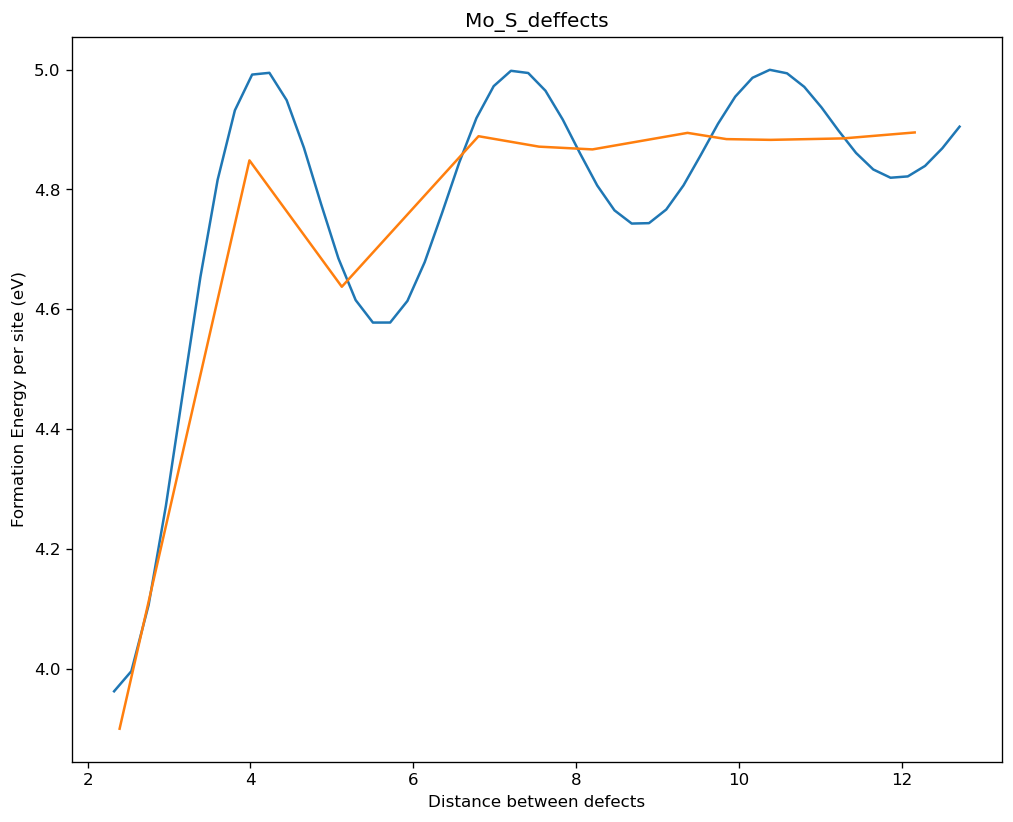

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)
distance= np.linspace(min(X), max(X))

#arg = 4.0 * (distance - 2.0)
#plt.plot(arg)
#print(arg)

#def oscl(arg):
 #   return np.cos(arg) * np.cos(arg) * np.log(arg) * np.log(arg) / arg
    
#print(oscl(distance))

#Energy = (5.0 - ((np.cos((((10.0 + 1.0) / distance) - 5.0)))**2 / (np.log(distance)**2)))


#Energy = (5.0 - ((np.sin((9.0 + distance)))**2 / (np.log(distance))**2))

Energy = (5.0 - ((5.0 * (  np.cos(10.0 + distance) * np.cos(10.0 + distance) * np.log(10.0 + distance) * np.log(10.0 + distance)/ (10.0 + distance) )) / distance))
 
#(5.0 - (5.0 / (((x1^2) - (5.0 / (x1^2))) - (OSCL((10.0 / ((x1^2) - 1.0)))))))
#5.0 - ((OSCL((4.0 * (x1 - 2.0))))^2)

print(distance)
#plt.plot(distance, Energy)
                 
print(Energy)                
plt.plot(distance,Energy)



ax.set_ylabel('Formation Energy per site (eV)'),
ax.set_xlabel('Distance between defects')
ax.set_title('Mo_S_deffects')
        
X1 = [
9.370277,
3.987968,
7.545995,
8.202622,
9.849015,
5.122973 ,
10.392087,
6.802601,
2.392859,
11.286035,
12.161154


    ]

X1 = np.sort(X1)
        
y1  = [
    3.899692,
    4.848482,
    4.637509,
    4.888823,
    4.871396,
    4.866795,
    4.894397,
    4.883973,
    4.882728,
    4.885172,
    4.895091


    ]  

plt.plot(X1,y1)
        

In [49]:
print('Raw equation in prefix notation: ', equations)
print('Equation in traditional notation: ', eq.repr())
#distance= np.linspace(min(X), max(X))
#print(eq.func(distance))

Raw equation in prefix notation:  ['sub 5.0 div sub 5.0 cos sub pow2 5.0 pow2 add x1 pow2 x1 pow2 x1'
 'sub 5.0 div sub 5.0 cos sub sub 5.0 div 5.0 x1 pow2 x1 pow2 x1'
 'sub 5.0 div sub 5.0 sin div sub 5.0 pow2 pow2 6.0 pow2 pow2 x1 pow2 x1'
 'sub 5.0 div sub 5.0 sin sub 5.0 div pow2 6.0 pow2 x1 pow2 x1'
 'sub 5.0 div sub 5.0 sin sub 5.0 pow2 div 6.0 div 6.0 div 6.0 x1 pow2 x1'
 'sub 5.0 div sub 5.0 sin sub 6.0 pow2 pow2 div 6.0 x1 pow2 x1'
 'sub 5.0 div sub 5.0 sin sub sub 5.0 2.0 pow2 mul 2.0 x1 pow2 x1'
 'sub 5.0 div sub 5.0 sin sub sub 5.0 div sub 5.0 x1 5.0 pow2 x1 pow2 x1'
 'sub 5.0 div sub 5.0 sin sub sub 5.0 div sub 5.0 x1 x1 pow2 x1 pow2 x1'
 'sub 5.0 div sub 5.0 sin sub sub 5.0 div sub 6.0 x1 pow2 x1 pow2 x1 pow2 x1'
 'sub 5.0 div sub 5.0 sin sub sub 5.0 pow2 div 4.0 pow2 x1 pow2 x1 pow2 x1'
 'sub 5.0 div sub 5.0 sin sub sub 5.0 pow2 div 5.0 pow2 x1 pow2 x1 pow2 x1'
 'sub 5.0 div sub 5.0 sin sub sub 5.0 pow2 div 6.0 pow x1 x1 pow2 x1 pow2 x1'
 'sub 5.0 div sub 5.0 sin sub sub

In [241]:
SSdist= [[3.124591,    2.639464],
[3.190316 ,  2.636693],
[4.465555  , 2.693197],
[5.525789   , 2.654705],
[6.348024,    2.653139],
[6.380631 ,   2.669060],
[7.104613  ,  2.657065],
[8.440782,    2.656502],
[9.000548 ,   2.659103],
[9.570947   , 2.664542],
[10.068073,    2.660485],
[11.051578 ,   2.662391],
[11.484792  ,  2.662500],
[11.502847   , 2.661262],
[11.919671,   2.663212],
[12.761263 ,   2.663527],
[13.138223  ,  2.663608],
[13.906264,   2.661751],
[14.252973 ,   2.663782]]

SSdist

#plt.plot(SSdist[:,0],SSdist[:,1])

[[3.124591, 2.639464],
 [3.190316, 2.636693],
 [4.465555, 2.693197],
 [5.525789, 2.654705],
 [6.348024, 2.653139],
 [6.380631, 2.66906],
 [7.104613, 2.657065],
 [8.440782, 2.656502],
 [9.000548, 2.659103],
 [9.570947, 2.664542],
 [10.068073, 2.660485],
 [11.051578, 2.662391],
 [11.484792, 2.6625],
 [11.502847, 2.661262],
 [11.919671, 2.663212],
 [12.761263, 2.663527],
 [13.138223, 2.663608],
 [13.906264, 2.661751],
 [14.252973, 2.663782]]

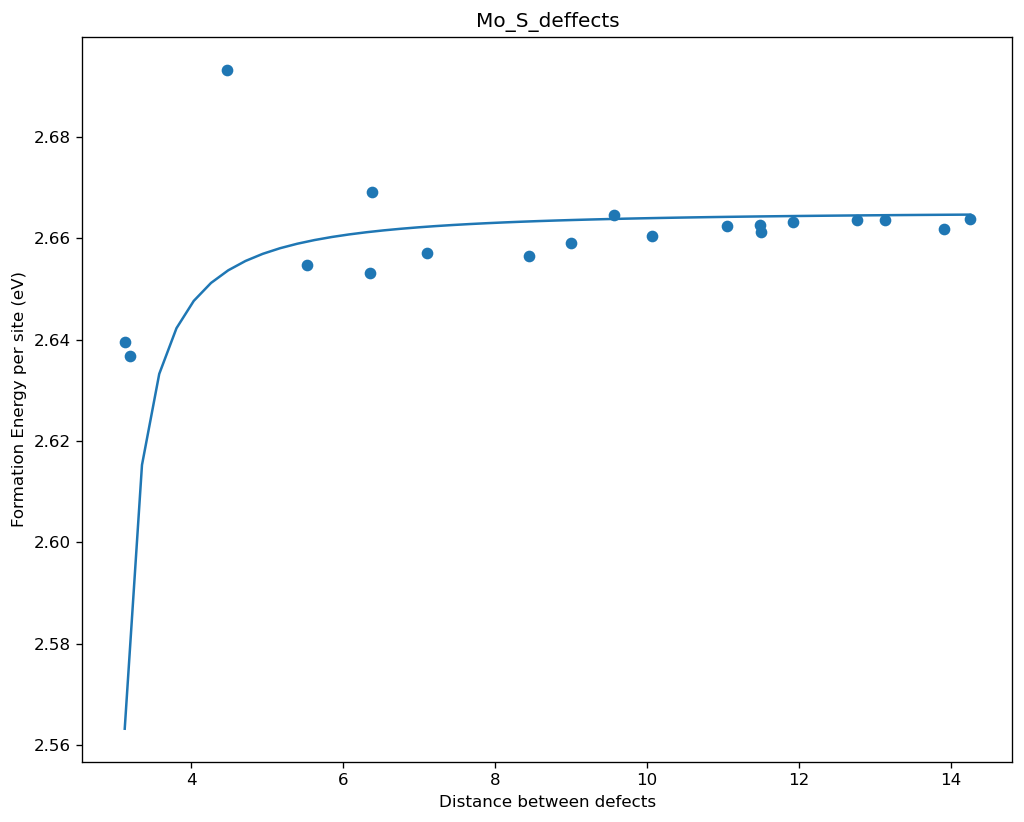

In [247]:

fig, ax = plt.subplots(figsize=(10, 8), dpi=120)
distance= np.linspace(min(X), max(X))

#Energy = (5.0 - ((np.exp(((5.0 + distance)) / (distance**distance))) / distance))
#Energy =  5.0 - np.sin(8.0 / distance**2) * np.sin(8.0 / distance**2) - (1.0 / 8.0)
Energy =  2.693 + (0.5 / ((((9 / x1)**2) - 10) - 8))
#print(distance)
#plt.plot(distance, Energy)
                 
#print(Energy)                
plt.plot(distance,Energy)


ax.set_ylabel('Formation Energy per site (eV)'),
ax.set_xlabel('Distance between defects')
ax.set_title('Mo_S_deffects')


X1 = [3.124591, 
3.190316 ,  
4.465555  ,
5.525789   ,
6.348024,   
6.380631 ,  
7.104613  , 
8.440782,    
9.000548 ,  
9.570947   , 
10.068073,    
11.051578 ,  
11.484792  , 
11.502847   , 
11.919671, 
12.761263 ,  
13.138223 ,
13.906264,
14.252973 ]
        
y1=[   2.639464,
 2.636693,
2.693197,
 2.654705,
  2.653139,
  2.669060,
 2.657065,
   2.656502,
  2.659103,
 2.664542,
 2.660485,
   2.662391,
  2.662500,
 2.661262,
2.663212,
 2.663527,
  2.663608,
  2.661751,
  2.663782]

plt.scatter(X1,y1)

In [9]:
best_idx = np.argmin(solver.stats.last_n_best_mses)
equations = np.array(solver.stats.last_n_best_formulas)
eq = rs_equation.Equation(equations[best_idx].split())

print('Raw equation in prefix notation: ', equations[best_idx])
print('Equation in traditional notation: ', eq.repr())

Raw equation in prefix notation:  mul 5.0 cos div div sub 5.0 div div 5.0 3.0 8.0 3.0 x1
Equation in traditional notation:  (5.0 * (cos((((5.0 - ((5.0 / 3.0) / 8.0)) / 3.0) / x1)))


In [ ]:
5.0 - (np.cos(12.0 - x1) * np.cos(12.0 - x1) * np.exp(12 - x1) / (x1 / 5.0))

In [16]:
X1 = np.sort([9.370277,
3.987968,
7.545995,
8.202622,
9.849015,
   5.122973 ,
    10.392087,
    6.802601,
    2.392859 ])
print(X1)

[ 2.392859  3.987968  5.122973  6.802601  7.545995  8.202622  9.370277
  9.849015 10.392087]


Text(0.5, 1.0, 'Mo_S_deffects')

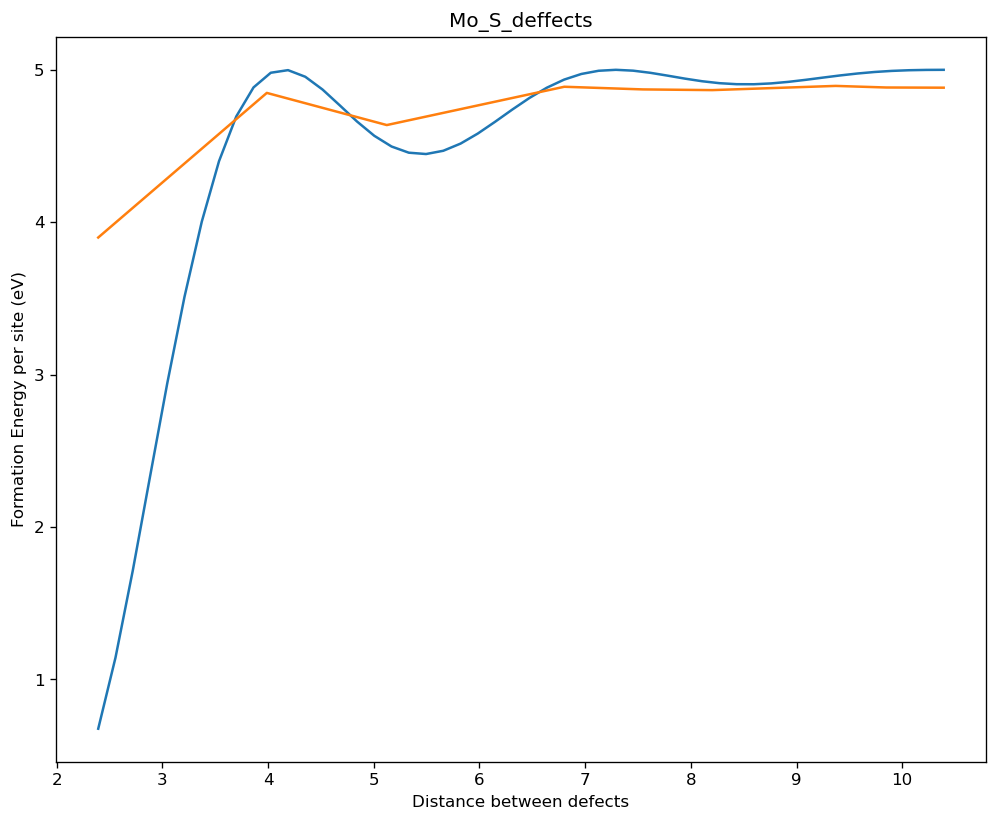

In [24]:


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)
distance= np.linspace(min(X), max(X))







Energy = 5.0 - ((np.cos(12.0 - distance) * np.cos(12.0 - distance) * np.log(12 - distance) * np.log(12 - distance)/ distance) / (distance / 5.0))

#print(distance)
#plt.plot(distance, Energy)
                 
#print(Energy)                
plt.plot(distance,Energy)



Y1 = [
    3.899692,
    4.848482,
    4.637509,
    4.888823,
    4.871396,
    4.866795,
    4.894397,
    4.883973,
    4.882728
    
    ]

plt.plot(X1,Y1)


ax.set_ylabel('Formation Energy per site (eV)'),
ax.set_xlabel('Distance between defects')
ax.set_title('Mo_S_deffects')

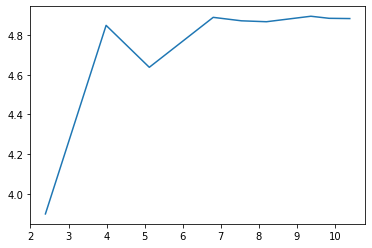

In [18]:
plt.plot(X1,Y1)

In [ ]:
5.0 - (sin(x1)**2 )* np.exp(-x1) /(x1**2)

In [ ]:
5.0 - (sin(x1 - 7.0)**2 + 4.0/x1)/x1

Mae :  0.009250492458105568


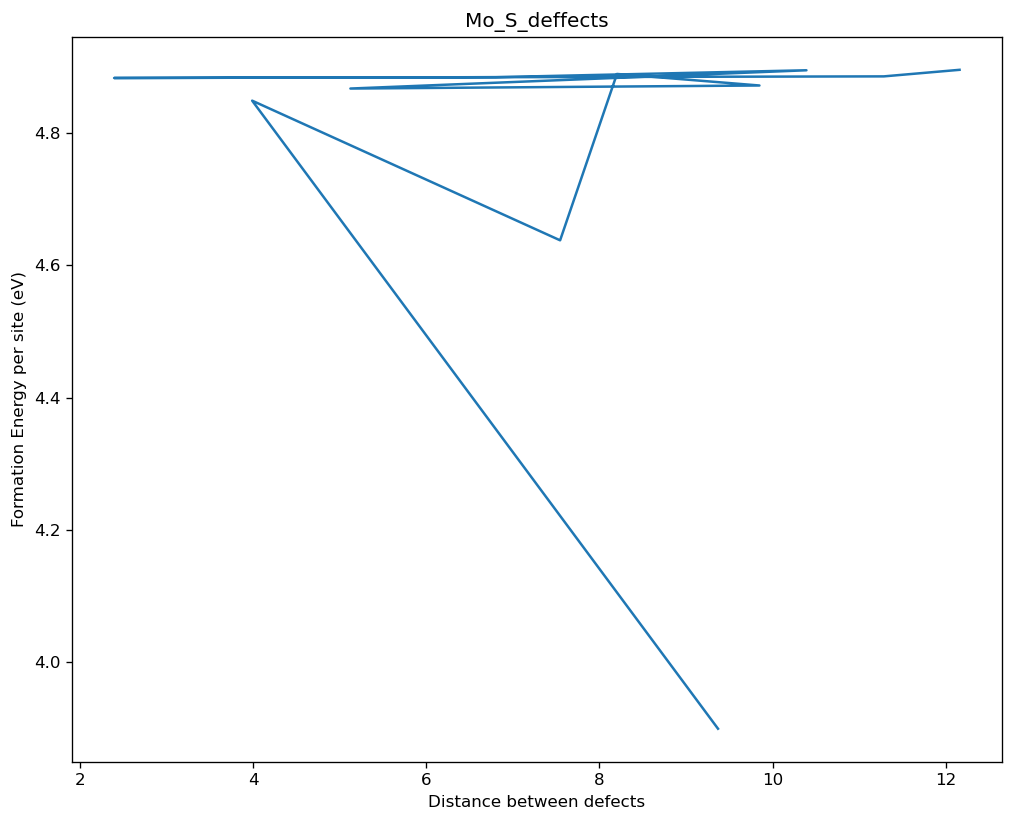

In [26]:

import numpy as np


import matplotlib.pyplot as plt




X1 = [
9.370277,
3.987968,
7.545995,
8.202622,
9.849015,
5.122973 ,
10.392087,
6.802601,
2.392859,
11.286035,
12.161154
    ]

x1 = np.sort(X1)

fig, ax = plt.subplots(figsize=(10, 8), dpi=120)
#distance= np.linspace(min(x1), max(x1))

#Energy = 5.0 - (np.sin(distance - 7.0)**2 + 4.0/distance)/distance

Energy = 4.895091+  (np.cos(0.5) * np.cos((8-2*x1)) - 1)* x1*x1 * np.exp(-x1)
#Energy = 5.0 - (np.cos(distance)**2 )* np.exp(-distance) /(distance**2)

#print(distance)
#plt.plot(distance, Energy)
                 
#print(Energy)                
#plt.plot(distance,Energy)



Y1 = [
    3.899692,
    4.848482,
    4.637509,
    4.888823,
    4.871396,
    4.866795,
    4.894397,
    4.883973,
    4.882728,
    4.885172,
    4.895091

    ]

plt.plot(X1,Y1)


ax.set_ylabel('Formation Energy per site (eV)'),
ax.set_xlabel('Distance between defects')
ax.set_title('Mo_S_deffects')


from sklearn.metrics import mean_absolute_error

Mae = mean_absolute_error(Y1, Energy)

print('Mae : ',Mae)




In [ ]:
Energy1 =   (np.cos(0.5) * np.cos((8-2*x1)) - 1)* x1*x1 * np.exp(-x1)
Energy2 =   (np.cos(0.5) * np.cos((8-2*x2)) - 1)* x2*x2 * np.exp(-x2)

In [150]:
import pandas as pd
Data=pd.read_pickle('3deffects_with_2MoS_distances_data_for_simbolic.pkl')
Data= pd.DataFrame(Data)
Data_for_sibolic = Data.to_numpy()
Data_for_sibolic.shape[0]

X = np.array([Data_for_sibolic[var][0] for var in range(Data_for_sibolic.shape[0])])


y = Data_for_sibolic[:,1]


#Dataset=X
#Dy = y
#Dataset

array([[ 6.8145602 ,  8.15283752],
       [ 6.8145602 ,  9.8490153 ],
       [12.96483908, 13.00246713],
       ...,
       [12.95855712, 14.80339399],
       [ 5.13884247,  5.13884247],
       [ 5.09108558,  5.09108558]])

In [151]:
X.shape[0]

743

In [161]:
y

array([4.142557383333345, 4.147499943333287, 4.148774333333297,
       4.116957879999973, 3.4854499400000045, 3.9842947100000097,
       4.143611303333349, 4.14718670000002, 4.151135823333334,
       4.146011673333305, 4.146363636666668, 4.143579049999971,
       3.961217546666679, 4.149410626666622, 3.4864263533333237,
       4.147498429999966, 4.152562983333307, 3.97074610333334,
       4.149870419999995, 4.138315730000007, 4.128794476666674,
       4.169539299999997, 3.977576089999957, 4.136907243333326,
       3.981289483333285, 4.137352970000014, 3.9923582866666343,
       3.981124856666687, 4.142571976666659, 4.117819036666636,
       4.1332700133333065, 4.143456216666664, 4.146009853333301,
       4.144414436666618, 3.9747257966666893, 4.144170903333285,
       4.144580483333281, 4.141269823333308, 3.9793195333333338,
       4.144078733333345, 4.161273019999953, 3.48744891333331,
       4.150259163333355, 4.141807376666672, 3.974401043333349,
       3.9792688666666436, 4.1295586

/tmp/ipykernel_6743/2606701758.py:17: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


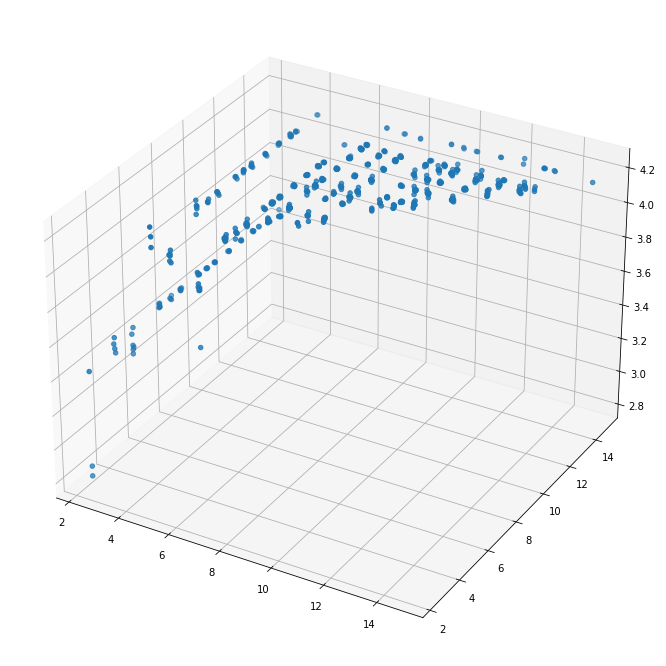

In [158]:
Data=pd.read_pickle('3deffects_with_2MoS_distances_data_for_simbolic.pkl')
Data= pd.DataFrame(Data)
Data_for_sibolic = Data.to_numpy()

X = np.array([Data_for_sibolic[var][0].tolist() for var in range(Data_for_sibolic.shape[0])])


y = Data_for_sibolic[:,1]


Dataset=X
Dy = y-max(y)
Dataset

fig = plt.figure(figsize=(12, 12))
#ax = fig.add_subplot(projection='3d')
ax = fig.gca(projection="3d")
sequence_containing_x_vals = Dataset[:,0].reshape(-1)
sequence_containing_y_vals = Dataset[:,1].reshape(-1)
sequence_containing_z_vals = y.reshape(-1)
#print(sequence_containing_x_vals)
#ax.view_init(20, -45)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)


/tmp/ipykernel_6743/3765157352.py:57: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


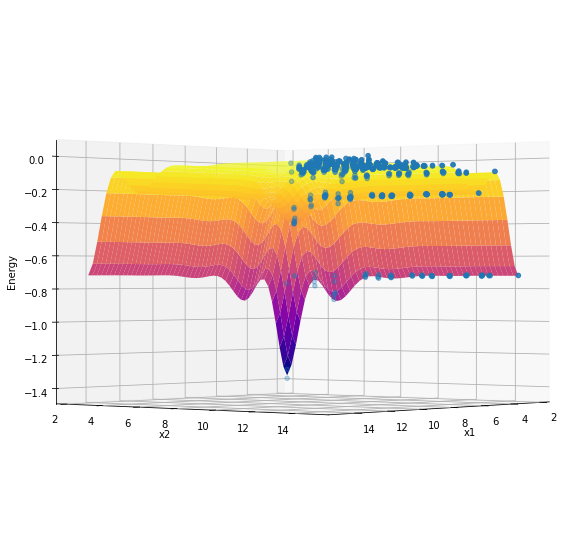

In [259]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np






pi = 3.14
#X1 = np.sort(X1)

x1= np.linspace(2.3928588998988944, 14.803393990478007)
x2= np.linspace(2.426648623735218, 14.80339399047801)

xx1, xx2 = np.meshgrid(x1, x2, sparse=True)



Energy= (2/3)*((np.cos(0.5) * np.cos((8-2*xx1)) - 1)* xx1*xx1 * np.exp(-xx1) + (np.cos(0.5) * np.cos((8-2*xx2)) - 1)* xx2*xx2 * np.exp(-xx2)- 0.6)


#print(distance)
#plt.plot(distance, Energy)
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111, projection='3d')
#print(Energy)                
sur1 = ax.plot_surface(xx1, xx2, Energy, cmap="plasma")

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Energy');

#ax.view_init(20, 0)
#plt.show()



Data=pd.read_pickle('3deffects_with_2MoS_distances_data_for_simbolic.pkl')
Data= pd.DataFrame(Data)
Data_for_sibolic = Data.to_numpy()

X = np.array([Data_for_sibolic[var][0].tolist() for var in range(Data_for_sibolic.shape[0])])


y = Data_for_sibolic[:,1]


Dataset=X
Dy = y - max(y)
Dataset


#ax = fig.add_subplot(projection='3d')
ax = fig.gca(projection="3d")
sequence_containing_x_vals = Dataset[:,0].reshape(-1)
sequence_containing_y_vals = Dataset[:,1].reshape(-1)
sequence_containing_z_vals = Dy.reshape(-1)
#print(sequence_containing_x_vals)
ax.view_init(0, 40)

datapoints = ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)

plt.show()


/tmp/ipykernel_6743/1509649152.py:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


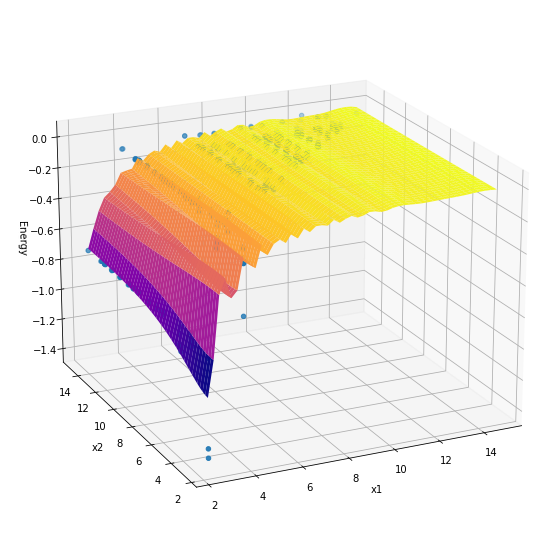

In [184]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np




pi = 3.14
#X1 = np.sort(X1)

x1= np.linspace(2.3928588998988944, 14.803393990478007)
x2= np.linspace(2.426648623735218, 14.80339399047801)

xx1, xx2 = np.meshgrid(x1, x2, sparse=True)



Energy= (4 / ((((np.cos((xx1 * xx1)) / (np.exp((xx2 / xx1)))) * xx2) - xx1) * xx1))


#print(distance)
#plt.plot(distance, Energy)
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111, projection='3d')
#print(Energy)                
sur1 = ax.plot_surface(xx1, xx2, Energy, cmap="plasma")

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Energy');


Data=pd.read_pickle('3deffects_with_2MoS_distances_data_for_simbolic.pkl')
Data= pd.DataFrame(Data)
Data_for_sibolic = Data.to_numpy()

X = np.array([Data_for_sibolic[var][0].tolist() for var in range(Data_for_sibolic.shape[0])])


y = Data_for_sibolic[:,1]


Dataset=X
Dy = y - max(y)
Dataset


#ax = fig.add_subplot(projection='3d')
ax = fig.gca(projection="3d")
sequence_containing_x_vals = Dataset[:,0].reshape(-1)
sequence_containing_y_vals = Dataset[:,1].reshape(-1)
sequence_containing_z_vals = Dy.reshape(-1)
#print(sequence_containing_x_vals)
#ax.view_init(-10, 90)

datapoints = ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)

#plt.show()





ax.view_init(20, 245)
plt.show()



In [62]:
X = [
[9.849015 ],
[3.1],
[4.4],
[4.8],
[5.6],
[6.3],
[10.392087] ,
[11.286035 ],
[12.161154],
[9.370277],
[3.987968],
[7.545995],
[8.202622],
[5.122973],
[6.802601],
[2.392859]


    ]

X = np.sort(X,axis=- 2)

y = [
    3.899692,
    4.5,
    4.848482,
    4.785,
    4.69,
    4.637509,
    4.7,
    4.85,
    4.888823,
    4.871396,
    4.866795,
    4.894397,
    4.883973,
    4.882728,
    4.885172,
    4.895091
    ]
Dataset=X
Dy = y
Dataset

array([[ 2.392859],
       [ 3.1     ],
       [ 3.987968],
       [ 4.4     ],
       [ 4.8     ],
       [ 5.122973],
       [ 5.6     ],
       [ 6.3     ],
       [ 6.802601],
       [ 7.545995],
       [ 8.202622],
       [ 9.370277],
       [ 9.849015],
       [10.392087],
       [11.286035],
       [12.161154]])

In [ ]:
X = [
[9.849015 ],
[10.392087] ,
[11.286035 ],
[12.161154],
[9.370277],
[3.987968],
[7.545995],
[8.202622],
[5.122973],
[6.802601],
[2.392859]


    ]

X = np.sort(X,axis=- 2)

y = [
    3.899692,

    4.848482,

    4.637509,

    4.888823,
    4.871396,
    4.866795,
    4.894397,
    4.883973,
    4.882728,
    4.885172,
    4.895091

    ]
Dataset=X
Dy = y
Dataset

In [63]:
Dataset=np.sort(X,axis=- 2)
Dy = y
for i in range (4):
    j=i+1
    def get_noise(ar):
        return np.random.normal(ar,0.003 * j * np.abs(ar))
    
    
    D=np.apply_along_axis(get_noise, 0, X)

    Dataset = np.concatenate((Dataset, D), axis=0)
    
    Dy= np.append(Dy, y)
    
print(Dataset)
print(Dy)

[[ 2.392859  ]
 [ 3.1       ]
 [ 3.987968  ]
 [ 4.4       ]
 [ 4.8       ]
 [ 5.122973  ]
 [ 5.6       ]
 [ 6.3       ]
 [ 6.802601  ]
 [ 7.545995  ]
 [ 8.202622  ]
 [ 9.370277  ]
 [ 9.849015  ]
 [10.392087  ]
 [11.286035  ]
 [12.161154  ]
 [ 2.37970213]
 [ 3.08891062]
 [ 3.9874905 ]
 [ 4.40649233]
 [ 4.80776464]
 [ 5.12445638]
 [ 5.60298214]
 [ 6.30155473]
 [ 6.81336453]
 [ 7.54091058]
 [ 8.17646085]
 [ 9.36125188]
 [ 9.85172489]
 [10.41686491]
 [11.28064859]
 [12.19166326]
 [ 2.41232804]
 [ 3.13877865]
 [ 4.01445152]
 [ 4.36096528]
 [ 4.79491881]
 [ 5.13483511]
 [ 5.59369321]
 [ 6.27190071]
 [ 6.88911231]
 [ 7.49185329]
 [ 8.1436468 ]
 [ 9.37239571]
 [ 9.88559311]
 [10.42448862]
 [11.27654823]
 [12.16516802]
 [ 2.39761174]
 [ 3.13174064]
 [ 4.05105141]
 [ 4.35053394]
 [ 4.76049641]
 [ 5.10469155]
 [ 5.63082997]
 [ 6.19670795]
 [ 6.72374772]
 [ 7.65535772]
 [ 8.15264393]
 [ 9.42353024]
 [ 9.87534396]
 [10.49646344]
 [11.43442695]
 [12.18839799]
 [ 2.42926294]
 [ 3.08312074]
 [ 3.97521

In [64]:
Dataset=np.array(Dataset)
Dy=np.array(Dy)
Dy=Dy - max(Dy)
Dy

array([-9.95399e-01, -3.95091e-01, -4.66090e-02, -1.10091e-01,
       -2.05091e-01, -2.57582e-01, -1.95091e-01, -4.50910e-02,
       -6.26800e-03, -2.36950e-02, -2.82960e-02, -6.94000e-04,
       -1.11180e-02, -1.23630e-02, -9.91900e-03,  0.00000e+00,
       -9.95399e-01, -3.95091e-01, -4.66090e-02, -1.10091e-01,
       -2.05091e-01, -2.57582e-01, -1.95091e-01, -4.50910e-02,
       -6.26800e-03, -2.36950e-02, -2.82960e-02, -6.94000e-04,
       -1.11180e-02, -1.23630e-02, -9.91900e-03,  0.00000e+00,
       -9.95399e-01, -3.95091e-01, -4.66090e-02, -1.10091e-01,
       -2.05091e-01, -2.57582e-01, -1.95091e-01, -4.50910e-02,
       -6.26800e-03, -2.36950e-02, -2.82960e-02, -6.94000e-04,
       -1.11180e-02, -1.23630e-02, -9.91900e-03,  0.00000e+00,
       -9.95399e-01, -3.95091e-01, -4.66090e-02, -1.10091e-01,
       -2.05091e-01, -2.57582e-01, -1.95091e-01, -4.50910e-02,
       -6.26800e-03, -2.36950e-02, -2.82960e-02, -6.94000e-04,
       -1.11180e-02, -1.23630e-02, -9.91900e-03,  0.000

In [65]:
def get_sub_trees_of_binary(list_of_tokens, idx):
    if list_of_tokens[idx] in rs_operators.OPERATORS:
        open_nodes = rs_operators.OPERATORS[list_of_tokens[idx]].arity
    else:
        open_nodes = 0
    left, right = [], []
    current_sub_tree = left
    for i, token in enumerate(list_of_tokens[idx + 1:]):
        if open_nodes == 0:
            break
        if open_nodes == 1:
            current_sub_tree = right
        current_sub_tree.append(token)

        if token in rs_operators.OPERATORS:
            operator = rs_operators.OPERATORS[token]
            open_nodes += operator.arity - 1
        else:
            open_nodes -= 1
    return left, right

In [66]:
def get_offsprings(list_of_tokens, idx):
    if list_of_tokens[idx] in rs_operators.OPERATORS:
        open_nodes = rs_operators.OPERATORS[list_of_tokens[idx]].arity
    else:
        open_nodes = 0
    traversal = []
    for i, token in enumerate(list_of_tokens[idx + 1:]):
        if open_nodes == 0:
            break
        traversal.append(token)
        if token in rs_operators.OPERATORS:
            operator = rs_operators.OPERATORS[token]
            open_nodes += operator.arity - 1
        else:
            open_nodes -= 1

    return traversal

def predicate(list_of_tokens, chek = False):

        
#    if list_of_tokens[0] == 'add':
 #       left, right = get_sub_trees_of_binary(list_of_tokens, 0)
  #      if right not in rs_operators or left !='div':
   #             return False

    if  'exp' not in list_of_tokens:
        return False
    if  'cos' not in list_of_tokens:
        return False    
#    if 'x1'  not in list_of_tokens or 'x2' not in list_of_tokens :
 #       return False

#   if 'cos**2' not in list_of_tokens and 'sin**2' not in list_of_tokens and 'sin' not in list_of_tokens and 'cos' not in list_of_tokens :
#       return False
    
 #   if list_of_tokens[0] != 'OSCE':
  #      return False
    
 #   if 'OSCE' not in list_of_tokens:
  #      return False

    for i, token in enumerate(list_of_tokens):
        offsprings = get_offsprings(list_of_tokens, i)      
        if  token == 'exp'  or token == 'pow2' or token == 'sin' or token == 'pow' or token == 'cos' or token == 'OSCE':
            if  'exp' in offsprings or 'pow2' in offsprings or 'sin' in offsprings or 'pow' in offsprings or 'cos' in offsprings or 'OSCE' in offsprings or  'x1' not in offsprings  :

                return False
           
            
            
    return True


In [67]:
Dy

array([-9.95399e-01, -3.95091e-01, -4.66090e-02, -1.10091e-01,
       -2.05091e-01, -2.57582e-01, -1.95091e-01, -4.50910e-02,
       -6.26800e-03, -2.36950e-02, -2.82960e-02, -6.94000e-04,
       -1.11180e-02, -1.23630e-02, -9.91900e-03,  0.00000e+00,
       -9.95399e-01, -3.95091e-01, -4.66090e-02, -1.10091e-01,
       -2.05091e-01, -2.57582e-01, -1.95091e-01, -4.50910e-02,
       -6.26800e-03, -2.36950e-02, -2.82960e-02, -6.94000e-04,
       -1.11180e-02, -1.23630e-02, -9.91900e-03,  0.00000e+00,
       -9.95399e-01, -3.95091e-01, -4.66090e-02, -1.10091e-01,
       -2.05091e-01, -2.57582e-01, -1.95091e-01, -4.50910e-02,
       -6.26800e-03, -2.36950e-02, -2.82960e-02, -6.94000e-04,
       -1.11180e-02, -1.23630e-02, -9.91900e-03,  0.00000e+00,
       -9.95399e-01, -3.95091e-01, -4.66090e-02, -1.10091e-01,
       -2.05091e-01, -2.57582e-01, -1.95091e-01, -4.50910e-02,
       -6.26800e-03, -2.36950e-02, -2.82960e-02, -6.94000e-04,
       -1.11180e-02, -1.23630e-02, -9.91900e-03,  0.000

In [68]:
#x_lows = [Dataset.min(axis=0)[var_idx] for var_idx in range(Dataset.shape[-1])]
#x_highs = [Dataset.max(axis=0)[var_idx] for var_idx in range(Dataset.shape[-1])]
x_lows = Dataset.min(axis=0)
x_highs = Dataset.max(axis=0)
y_dom = (Dy.min()-1, Dy.max()+1)
#domains_grid = (x_lows, x_highs, y_dom)
domains_grid = (x_lows-2, x_highs+5, y_dom)
print(domains_grid )

(array([0.37970213]), array([17.25728867]), (-1.995399, 1.0))


In [17]:
import torch
torch.version.cuda

'11.3'

In [69]:
solver = run_experiment(Dataset, Dy,
        functions=['add', 'sub', 'mul', 'div','pow2','cos','pi','0.5','exp','pow'],
        #functions=list(rs_operators.OPERATORS.keys()),
        #free_variables=['x1','x2','x3','x4','x5','x6'],
        free_variables=['x1'],
        wandb_proj='SEGVAE2',
        project_name='SEGVAE2_sympy_,MoS2_pow2_2d_simple_MoS_cos_pow_5poitsmore',
        constants=[],
        float_constants=rs_operators.FLOAT_CONST + rs_operators.INT_CONST,
        #float_constants=None,
        epochs=3000,
        n_formulas_to_sample=5000,
        max_formula_length=30,
        formula_predicate=predicate,
        true_formula=rs_equation.Equation(['5']),
        latent=128,
        lstm_hidden_dim=64,
        device='cuda',
        train_size=50000,
        log_intermediate_steps=True,
        domains=domains_grid,
        simplification=False,
        pretrain_path=None)

best_log_mean_mse_top_1,█▇▆▅▅▅▅▅▅▅▅▄▄▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁
best_log_mean_mse_top_10,█▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
best_log_mean_mse_top_100,█▅▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_log_mean_mse_top_25,█▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_log_mean_mse_top_250,█▆▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_log_mean_mse_top_50,█▅▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_log_mean_mse_top_500,█▆▅▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_mean_mse_top_1,█▆▄▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁
best_mean_mse_top_10,█▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_mean_mse_top_100,█▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_mean_mse_top_25,█▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


===== START PRETRAIN =====
	[training] batches count: 196
	[training] loss: 30.352, rec loss: 30.244, kl: 0.215
	[validation] loss: 25.866, rec loss: 25.860, kl: 0.012
	[training] batches count: 196
	[training] loss: 25.322, rec loss: 25.313, kl: 0.018
	[validation] loss: 23.797, rec loss: 23.794, kl: 0.006
	[training] batches count: 196
	[training] loss: 24.013, rec loss: 24.008, kl: 0.011
	[validation] loss: 23.073, rec loss: 23.071, kl: 0.005
	[training] batches count: 196
	[training] loss: 23.511, rec loss: 23.507, kl: 0.008
	[validation] loss: 22.885, rec loss: 22.881, kl: 0.006
	[training] batches count: 196
	[training] loss: 23.237, rec loss: 23.233, kl: 0.008
	[validation] loss: 22.543, rec loss: 22.540, kl: 0.006
	[training] batches count: 196
	[training] loss: 23.084, rec loss: 23.079, kl: 0.010
	[validation] loss: 22.438, rec loss: 22.433, kl: 0.010
	[training] batches count: 196
	[training] loss: 22.959, rec loss: 22.953, kl: 0.011
	[validation] loss: 22.351, rec loss: 22.3

/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 23.547, rec loss: 21.996, kl: 3.102
	[validation] loss: 23.473, rec loss: 21.837, kl: 3.272


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 22.609, rec loss: 20.973, kl: 3.272
	[validation] loss: 21.967, rec loss: 20.115, kl: 3.704


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 21.829, rec loss: 20.008, kl: 3.640
	[validation] loss: 21.066, rec loss: 19.296, kl: 3.540


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 21.550, rec loss: 19.822, kl: 3.456
	[validation] loss: 21.230, rec loss: 19.456, kl: 3.546


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 21.063, rec loss: 19.298, kl: 3.529
	[validation] loss: 20.669, rec loss: 18.882, kl: 3.574


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 19.067, rec loss: 17.278, kl: 3.577
	[validation] loss: 18.785, rec loss: 16.950, kl: 3.670


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 18.555, rec loss: 16.667, kl: 3.775
	[validation] loss: 18.246, rec loss: 16.513, kl: 3.466


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 18.526, rec loss: 16.751, kl: 3.550
	[validation] loss: 17.969, rec loss: 16.192, kl: 3.554


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 18.845, rec loss: 17.114, kl: 3.463
	[validation] loss: 18.253, rec loss: 16.640, kl: 3.227


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 19.118, rec loss: 17.564, kl: 3.107
	[validation] loss: 18.823, rec loss: 17.252, kl: 3.142


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 19.347, rec loss: 17.888, kl: 2.918
	[validation] loss: 19.719, rec loss: 18.280, kl: 2.879


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 18.936, rec loss: 17.503, kl: 2.867
	[validation] loss: 18.303, rec loss: 16.862, kl: 2.883


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 20.500, rec loss: 19.033, kl: 2.934
	[validation] loss: 19.952, rec loss: 18.505, kl: 2.894


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 19.392, rec loss: 17.909, kl: 2.967
	[validation] loss: 18.744, rec loss: 17.237, kl: 3.013


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 20.288, rec loss: 18.727, kl: 3.121
	[validation] loss: 19.812, rec loss: 18.278, kl: 3.069


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 18.844, rec loss: 17.379, kl: 2.929
	[validation] loss: 18.103, rec loss: 16.482, kl: 3.241


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 18.494, rec loss: 16.909, kl: 3.171
	[validation] loss: 17.945, rec loss: 16.380, kl: 3.129


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 17.750, rec loss: 16.229, kl: 3.040
	[validation] loss: 17.206, rec loss: 15.725, kl: 2.963


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 17.951, rec loss: 16.501, kl: 2.901
	[validation] loss: 17.305, rec loss: 15.866, kl: 2.878


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 16.996, rec loss: 15.574, kl: 2.844
	[validation] loss: 16.704, rec loss: 15.337, kl: 2.733


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 17.026, rec loss: 15.640, kl: 2.771
	[validation] loss: 16.448, rec loss: 15.024, kl: 2.848


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 16.139, rec loss: 14.781, kl: 2.717
	[validation] loss: 15.682, rec loss: 14.284, kl: 2.795


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 17.240, rec loss: 15.857, kl: 2.767
	[validation] loss: 16.772, rec loss: 15.344, kl: 2.857


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 16.620, rec loss: 15.214, kl: 2.812
	[validation] loss: 16.207, rec loss: 14.854, kl: 2.708


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 15.153, rec loss: 13.892, kl: 2.522
	[validation] loss: 14.955, rec loss: 13.708, kl: 2.495


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 15.530, rec loss: 14.285, kl: 2.491
	[validation] loss: 15.444, rec loss: 14.176, kl: 2.536


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 15.851, rec loss: 14.618, kl: 2.466
	[validation] loss: 15.206, rec loss: 13.984, kl: 2.445


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 13.591, rec loss: 12.435, kl: 2.311
	[validation] loss: 13.212, rec loss: 12.011, kl: 2.403


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.898, rec loss: 11.780, kl: 2.237
	[validation] loss: 12.257, rec loss: 11.149, kl: 2.216


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.409, rec loss: 13.262, kl: 2.294
	[validation] loss: 14.074, rec loss: 12.907, kl: 2.333


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 13.773, rec loss: 12.624, kl: 2.298
	[validation] loss: 13.587, rec loss: 12.456, kl: 2.262


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.135, rec loss: 13.046, kl: 2.179
	[validation] loss: 13.731, rec loss: 12.619, kl: 2.222


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.648, rec loss: 13.492, kl: 2.313
	[validation] loss: 14.386, rec loss: 13.209, kl: 2.354


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.728, rec loss: 13.554, kl: 2.347
	[validation] loss: 14.157, rec loss: 12.981, kl: 2.351


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.935, rec loss: 13.805, kl: 2.259
	[validation] loss: 14.149, rec loss: 12.982, kl: 2.335


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.180, rec loss: 13.042, kl: 2.275
	[validation] loss: 13.959, rec loss: 12.848, kl: 2.224


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.130, rec loss: 13.030, kl: 2.199
	[validation] loss: 13.596, rec loss: 12.488, kl: 2.215


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.401, rec loss: 13.300, kl: 2.202
	[validation] loss: 14.041, rec loss: 12.879, kl: 2.324


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 15.536, rec loss: 14.361, kl: 2.350
	[validation] loss: 14.892, rec loss: 13.710, kl: 2.363


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 13.672, rec loss: 12.533, kl: 2.277
	[validation] loss: 13.409, rec loss: 12.292, kl: 2.233


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 15.197, rec loss: 14.057, kl: 2.281
	[validation] loss: 14.974, rec loss: 13.810, kl: 2.328


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 15.530, rec loss: 14.369, kl: 2.321
	[validation] loss: 15.285, rec loss: 14.108, kl: 2.354


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 16.154, rec loss: 14.974, kl: 2.361
	[validation] loss: 15.496, rec loss: 14.351, kl: 2.289


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 15.469, rec loss: 14.349, kl: 2.238
	[validation] loss: 15.518, rec loss: 14.423, kl: 2.189


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 15.985, rec loss: 14.887, kl: 2.195
	[validation] loss: 15.621, rec loss: 14.540, kl: 2.161


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 15.919, rec loss: 14.843, kl: 2.150
	[validation] loss: 15.476, rec loss: 14.395, kl: 2.162


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.728, rec loss: 13.698, kl: 2.061
	[validation] loss: 14.643, rec loss: 13.589, kl: 2.108


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 13.956, rec loss: 12.926, kl: 2.059
	[validation] loss: 13.365, rec loss: 12.346, kl: 2.037


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.497, rec loss: 13.485, kl: 2.025
	[validation] loss: 14.049, rec loss: 13.043, kl: 2.013


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.235, rec loss: 13.267, kl: 1.937
	[validation] loss: 13.870, rec loss: 12.886, kl: 1.968


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.567, rec loss: 13.572, kl: 1.989
	[validation] loss: 14.407, rec loss: 13.395, kl: 2.023


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 15.596, rec loss: 14.611, kl: 1.971
	[validation] loss: 15.493, rec loss: 14.449, kl: 2.089


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 16.017, rec loss: 14.969, kl: 2.096
	[validation] loss: 15.523, rec loss: 14.463, kl: 2.120


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 15.643, rec loss: 14.595, kl: 2.095
	[validation] loss: 15.229, rec loss: 14.132, kl: 2.193


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 16.131, rec loss: 15.021, kl: 2.220
	[validation] loss: 15.262, rec loss: 14.116, kl: 2.292


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 15.967, rec loss: 14.852, kl: 2.229
	[validation] loss: 15.674, rec loss: 14.501, kl: 2.345


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 15.790, rec loss: 14.566, kl: 2.448
	[validation] loss: 15.544, rec loss: 14.362, kl: 2.365


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 15.269, rec loss: 14.097, kl: 2.344
	[validation] loss: 14.906, rec loss: 13.743, kl: 2.326


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.788, rec loss: 13.647, kl: 2.282
	[validation] loss: 14.391, rec loss: 13.222, kl: 2.338


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.864, rec loss: 13.718, kl: 2.291
	[validation] loss: 14.327, rec loss: 13.164, kl: 2.326


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.323, rec loss: 13.125, kl: 2.396
	[validation] loss: 13.476, rec loss: 12.311, kl: 2.330


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.445, rec loss: 13.340, kl: 2.211
	[validation] loss: 14.018, rec loss: 12.912, kl: 2.213


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.945, rec loss: 13.849, kl: 2.192
	[validation] loss: 14.420, rec loss: 13.273, kl: 2.295


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.985, rec loss: 13.899, kl: 2.173
	[validation] loss: 14.786, rec loss: 13.696, kl: 2.181


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 15.229, rec loss: 14.134, kl: 2.190
	[validation] loss: 14.937, rec loss: 13.853, kl: 2.169


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 15.729, rec loss: 14.637, kl: 2.183
	[validation] loss: 15.105, rec loss: 13.988, kl: 2.233


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.709, rec loss: 13.587, kl: 2.244
	[validation] loss: 14.426, rec loss: 13.325, kl: 2.203


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.536, rec loss: 13.461, kl: 2.151
	[validation] loss: 14.032, rec loss: 12.959, kl: 2.146


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.494, rec loss: 13.424, kl: 2.140
	[validation] loss: 13.920, rec loss: 12.855, kl: 2.129


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 13.295, rec loss: 12.247, kl: 2.096
	[validation] loss: 13.075, rec loss: 12.017, kl: 2.117


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 13.499, rec loss: 12.481, kl: 2.036
	[validation] loss: 13.098, rec loss: 12.052, kl: 2.091


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.994, rec loss: 11.973, kl: 2.042
	[validation] loss: 12.475, rec loss: 11.455, kl: 2.040


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 13.309, rec loss: 12.315, kl: 1.988
	[validation] loss: 13.134, rec loss: 12.111, kl: 2.046


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 13.522, rec loss: 12.505, kl: 2.034
	[validation] loss: 12.825, rec loss: 11.813, kl: 2.025


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.016, rec loss: 12.967, kl: 2.098
	[validation] loss: 13.841, rec loss: 12.822, kl: 2.038


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 13.828, rec loss: 12.821, kl: 2.014
	[validation] loss: 13.519, rec loss: 12.509, kl: 2.021


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 14.003, rec loss: 12.980, kl: 2.046
	[validation] loss: 13.644, rec loss: 12.635, kl: 2.018


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 13.199, rec loss: 12.197, kl: 2.004
	[validation] loss: 12.858, rec loss: 11.871, kl: 1.973


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.485, rec loss: 11.489, kl: 1.990
	[validation] loss: 12.298, rec loss: 11.321, kl: 1.954


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.554, rec loss: 11.566, kl: 1.977
	[validation] loss: 12.329, rec loss: 11.294, kl: 2.070


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.159, rec loss: 11.092, kl: 2.134
	[validation] loss: 11.796, rec loss: 10.720, kl: 2.151


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.117, rec loss: 11.052, kl: 2.129
	[validation] loss: 11.735, rec loss: 10.689, kl: 2.091


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.393, rec loss: 11.388, kl: 2.011
	[validation] loss: 11.705, rec loss: 10.691, kl: 2.028


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.277, rec loss: 11.279, kl: 1.997
	[validation] loss: 11.833, rec loss: 10.803, kl: 2.061


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.563, rec loss: 10.587, kl: 1.952
	[validation] loss: 10.976, rec loss: 9.989, kl: 1.974


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.508, rec loss: 10.526, kl: 1.962
	[validation] loss: 11.151, rec loss: 10.165, kl: 1.971


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.174, rec loss: 10.243, kl: 1.862
	[validation] loss: 10.870, rec loss: 9.924, kl: 1.893


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.086, rec loss: 10.117, kl: 1.938
	[validation] loss: 10.664, rec loss: 9.695, kl: 1.938


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.170, rec loss: 10.251, kl: 1.838
	[validation] loss: 10.708, rec loss: 9.795, kl: 1.826


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.478, rec loss: 10.567, kl: 1.821
	[validation] loss: 11.143, rec loss: 10.250, kl: 1.786


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.404, rec loss: 10.519, kl: 1.768
	[validation] loss: 11.148, rec loss: 10.262, kl: 1.770


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.015, rec loss: 10.148, kl: 1.734
	[validation] loss: 10.590, rec loss: 9.723, kl: 1.734


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.763, rec loss: 9.911, kl: 1.704
	[validation] loss: 10.451, rec loss: 9.604, kl: 1.695


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.672, rec loss: 9.852, kl: 1.641
	[validation] loss: 10.252, rec loss: 9.427, kl: 1.649


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.259, rec loss: 9.457, kl: 1.604
	[validation] loss: 10.011, rec loss: 9.221, kl: 1.580


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.963, rec loss: 9.190, kl: 1.546
	[validation] loss: 9.796, rec loss: 9.049, kl: 1.493


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.919, rec loss: 9.165, kl: 1.506
	[validation] loss: 9.625, rec loss: 8.884, kl: 1.482


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.647, rec loss: 8.917, kl: 1.458
	[validation] loss: 9.222, rec loss: 8.472, kl: 1.500


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.607, rec loss: 8.824, kl: 1.567
	[validation] loss: 9.234, rec loss: 8.436, kl: 1.596


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.436, rec loss: 8.636, kl: 1.599
	[validation] loss: 8.947, rec loss: 8.130, kl: 1.634


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.935, rec loss: 8.135, kl: 1.600
	[validation] loss: 8.736, rec loss: 7.931, kl: 1.609


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.617, rec loss: 8.764, kl: 1.707
	[validation] loss: 9.126, rec loss: 8.286, kl: 1.680


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.682, rec loss: 8.832, kl: 1.699
	[validation] loss: 9.440, rec loss: 8.581, kl: 1.717


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.317, rec loss: 8.505, kl: 1.624
	[validation] loss: 9.050, rec loss: 8.239, kl: 1.622


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.367, rec loss: 8.550, kl: 1.634
	[validation] loss: 9.076, rec loss: 8.244, kl: 1.663


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.062, rec loss: 9.221, kl: 1.681
	[validation] loss: 9.477, rec loss: 8.638, kl: 1.678


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.760, rec loss: 8.952, kl: 1.616
	[validation] loss: 9.212, rec loss: 8.395, kl: 1.634


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.696, rec loss: 8.891, kl: 1.609
	[validation] loss: 9.158, rec loss: 8.333, kl: 1.651


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.779, rec loss: 8.922, kl: 1.713
	[validation] loss: 9.444, rec loss: 8.593, kl: 1.701


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.894, rec loss: 9.052, kl: 1.683
	[validation] loss: 9.541, rec loss: 8.714, kl: 1.652


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.626, rec loss: 8.835, kl: 1.582
	[validation] loss: 9.180, rec loss: 8.392, kl: 1.576


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.211, rec loss: 8.439, kl: 1.544
	[validation] loss: 8.761, rec loss: 8.010, kl: 1.502


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.176, rec loss: 8.405, kl: 1.542
	[validation] loss: 8.807, rec loss: 8.033, kl: 1.549


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.741, rec loss: 8.969, kl: 1.546
	[validation] loss: 9.397, rec loss: 8.645, kl: 1.504


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.129, rec loss: 8.427, kl: 1.405
	[validation] loss: 8.710, rec loss: 7.985, kl: 1.450


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.918, rec loss: 8.189, kl: 1.458
	[validation] loss: 8.545, rec loss: 7.810, kl: 1.470


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.093, rec loss: 9.309, kl: 1.567
	[validation] loss: 9.526, rec loss: 8.717, kl: 1.618


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.078, rec loss: 9.304, kl: 1.548
	[validation] loss: 9.661, rec loss: 8.860, kl: 1.601


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.211, rec loss: 8.409, kl: 1.604
	[validation] loss: 8.895, rec loss: 8.116, kl: 1.560


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.541, rec loss: 8.757, kl: 1.569
	[validation] loss: 9.257, rec loss: 8.472, kl: 1.569


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.601, rec loss: 8.820, kl: 1.562
	[validation] loss: 9.419, rec loss: 8.652, kl: 1.534


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.446, rec loss: 8.702, kl: 1.489
	[validation] loss: 9.208, rec loss: 8.489, kl: 1.439


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.442, rec loss: 8.685, kl: 1.513
	[validation] loss: 9.157, rec loss: 8.431, kl: 1.450


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.718, rec loss: 8.971, kl: 1.494
	[validation] loss: 9.473, rec loss: 8.759, kl: 1.429


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.192, rec loss: 9.370, kl: 1.644
	[validation] loss: 9.649, rec loss: 8.820, kl: 1.658


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.451, rec loss: 9.650, kl: 1.602
	[validation] loss: 10.031, rec loss: 9.220, kl: 1.621


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.310, rec loss: 9.509, kl: 1.602
	[validation] loss: 10.099, rec loss: 9.303, kl: 1.593


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.641, rec loss: 9.851, kl: 1.580
	[validation] loss: 10.152, rec loss: 9.343, kl: 1.617


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.732, rec loss: 9.929, kl: 1.608
	[validation] loss: 10.556, rec loss: 9.709, kl: 1.693


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.916, rec loss: 9.134, kl: 1.565
	[validation] loss: 9.575, rec loss: 8.774, kl: 1.602


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.536, rec loss: 9.684, kl: 1.704
	[validation] loss: 9.951, rec loss: 9.094, kl: 1.714


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.619, rec loss: 9.758, kl: 1.721
	[validation] loss: 9.996, rec loss: 9.124, kl: 1.744


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.165, rec loss: 9.294, kl: 1.742
	[validation] loss: 9.964, rec loss: 9.105, kl: 1.717


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.500, rec loss: 9.646, kl: 1.709
	[validation] loss: 10.134, rec loss: 9.258, kl: 1.752
	[training] batches count: 1
	[training] loss: 10.467, rec loss: 9.562, kl: 1.810
	[validation] loss: 10.364, rec loss: 9.439, kl: 1.851


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.840, rec loss: 8.962, kl: 1.757
	[validation] loss: 9.513, rec loss: 8.640, kl: 1.745


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.828, rec loss: 8.953, kl: 1.751
	[validation] loss: 9.690, rec loss: 8.831, kl: 1.718


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.180, rec loss: 9.335, kl: 1.690
	[validation] loss: 9.948, rec loss: 9.122, kl: 1.652


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.876, rec loss: 9.064, kl: 1.624
	[validation] loss: 9.653, rec loss: 8.867, kl: 1.573


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.567, rec loss: 9.769, kl: 1.596
	[validation] loss: 10.500, rec loss: 9.716, kl: 1.570


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.750, rec loss: 9.927, kl: 1.647
	[validation] loss: 10.221, rec loss: 9.390, kl: 1.662


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.753, rec loss: 9.922, kl: 1.661
	[validation] loss: 10.401, rec loss: 9.551, kl: 1.701


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.261, rec loss: 10.439, kl: 1.644
	[validation] loss: 10.819, rec loss: 9.988, kl: 1.663


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.612, rec loss: 10.780, kl: 1.664
	[validation] loss: 11.389, rec loss: 10.549, kl: 1.681


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 12.008, rec loss: 11.172, kl: 1.670
	[validation] loss: 11.135, rec loss: 10.257, kl: 1.757


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.498, rec loss: 11.593, kl: 1.810
	[validation] loss: 11.970, rec loss: 11.022, kl: 1.895


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.527, rec loss: 11.634, kl: 1.786
	[validation] loss: 11.766, rec loss: 10.841, kl: 1.851


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.741, rec loss: 10.826, kl: 1.831
	[validation] loss: 11.215, rec loss: 10.304, kl: 1.821


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.212, rec loss: 10.347, kl: 1.729
	[validation] loss: 10.724, rec loss: 9.890, kl: 1.669


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.734, rec loss: 10.887, kl: 1.694
	[validation] loss: 10.962, rec loss: 10.146, kl: 1.631


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.731, rec loss: 10.964, kl: 1.535
	[validation] loss: 11.271, rec loss: 10.535, kl: 1.471


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.465, rec loss: 10.742, kl: 1.445
	[validation] loss: 11.117, rec loss: 10.409, kl: 1.417


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.455, rec loss: 10.710, kl: 1.489
	[validation] loss: 11.027, rec loss: 10.320, kl: 1.415


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.486, rec loss: 10.778, kl: 1.416
	[validation] loss: 10.989, rec loss: 10.315, kl: 1.347


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.461, rec loss: 10.826, kl: 1.271
	[validation] loss: 11.056, rec loss: 10.429, kl: 1.254


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.441, rec loss: 10.782, kl: 1.318
	[validation] loss: 10.914, rec loss: 10.256, kl: 1.317


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 12.729, rec loss: 12.005, kl: 1.449
	[validation] loss: 12.265, rec loss: 11.565, kl: 1.400


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.692, rec loss: 11.954, kl: 1.476
	[validation] loss: 12.211, rec loss: 11.463, kl: 1.497


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.545, rec loss: 11.782, kl: 1.525
	[validation] loss: 12.177, rec loss: 11.404, kl: 1.546


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.891, rec loss: 11.163, kl: 1.457
	[validation] loss: 11.501, rec loss: 10.774, kl: 1.455


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.906, rec loss: 11.222, kl: 1.367
	[validation] loss: 11.446, rec loss: 10.746, kl: 1.400


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.948, rec loss: 10.287, kl: 1.321
	[validation] loss: 10.374, rec loss: 9.703, kl: 1.343


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.117, rec loss: 10.441, kl: 1.351
	[validation] loss: 10.664, rec loss: 9.987, kl: 1.354


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.424, rec loss: 10.742, kl: 1.363
	[validation] loss: 10.872, rec loss: 10.198, kl: 1.347


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.846, rec loss: 11.128, kl: 1.435
	[validation] loss: 11.445, rec loss: 10.741, kl: 1.408


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.092, rec loss: 11.310, kl: 1.564
	[validation] loss: 11.523, rec loss: 10.758, kl: 1.530


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.377, rec loss: 10.629, kl: 1.495
	[validation] loss: 11.150, rec loss: 10.393, kl: 1.515


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.043, rec loss: 11.259, kl: 1.567
	[validation] loss: 11.505, rec loss: 10.722, kl: 1.567


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.866, rec loss: 11.058, kl: 1.616
	[validation] loss: 11.318, rec loss: 10.511, kl: 1.613


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.821, rec loss: 11.014, kl: 1.614
	[validation] loss: 11.453, rec loss: 10.625, kl: 1.655


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.296, rec loss: 10.563, kl: 1.467
	[validation] loss: 10.861, rec loss: 10.123, kl: 1.475


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.853, rec loss: 11.086, kl: 1.534
	[validation] loss: 11.426, rec loss: 10.667, kl: 1.519


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.233, rec loss: 10.487, kl: 1.492
	[validation] loss: 10.684, rec loss: 9.955, kl: 1.458


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.783, rec loss: 10.058, kl: 1.451
	[validation] loss: 10.464, rec loss: 9.754, kl: 1.418


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.784, rec loss: 10.076, kl: 1.415
	[validation] loss: 10.315, rec loss: 9.611, kl: 1.407


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.080, rec loss: 9.402, kl: 1.355
	[validation] loss: 9.609, rec loss: 8.927, kl: 1.363


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.022, rec loss: 9.345, kl: 1.354
	[validation] loss: 9.570, rec loss: 8.882, kl: 1.376


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.890, rec loss: 9.223, kl: 1.335
	[validation] loss: 9.546, rec loss: 8.856, kl: 1.380


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.894, rec loss: 9.202, kl: 1.384
	[validation] loss: 9.544, rec loss: 8.836, kl: 1.416


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.819, rec loss: 9.132, kl: 1.374
	[validation] loss: 9.480, rec loss: 8.784, kl: 1.392


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.559, rec loss: 9.813, kl: 1.491
	[validation] loss: 10.140, rec loss: 9.408, kl: 1.465


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.706, rec loss: 9.976, kl: 1.459
	[validation] loss: 10.152, rec loss: 9.428, kl: 1.448


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.089, rec loss: 10.339, kl: 1.500
	[validation] loss: 10.601, rec loss: 9.818, kl: 1.565


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.982, rec loss: 10.215, kl: 1.534
	[validation] loss: 10.712, rec loss: 9.942, kl: 1.539


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.149, rec loss: 10.373, kl: 1.550
	[validation] loss: 10.779, rec loss: 10.008, kl: 1.544


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.150, rec loss: 10.333, kl: 1.634
	[validation] loss: 10.716, rec loss: 9.884, kl: 1.662


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.877, rec loss: 10.102, kl: 1.551
	[validation] loss: 10.072, rec loss: 9.302, kl: 1.540


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.288, rec loss: 9.566, kl: 1.444
	[validation] loss: 9.571, rec loss: 8.859, kl: 1.424


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.644, rec loss: 9.888, kl: 1.511
	[validation] loss: 10.218, rec loss: 9.460, kl: 1.516


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.979, rec loss: 10.239, kl: 1.481
	[validation] loss: 10.328, rec loss: 9.580, kl: 1.496


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.820, rec loss: 10.081, kl: 1.477
	[validation] loss: 10.363, rec loss: 9.614, kl: 1.497


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.048, rec loss: 10.265, kl: 1.565
	[validation] loss: 10.309, rec loss: 9.512, kl: 1.594


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.241, rec loss: 10.442, kl: 1.598
	[validation] loss: 10.911, rec loss: 10.113, kl: 1.596


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.160, rec loss: 10.402, kl: 1.517
	[validation] loss: 10.607, rec loss: 9.825, kl: 1.566


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.107, rec loss: 10.295, kl: 1.625
	[validation] loss: 10.442, rec loss: 9.641, kl: 1.602


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.461, rec loss: 10.677, kl: 1.568
	[validation] loss: 11.126, rec loss: 10.353, kl: 1.548


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.773, rec loss: 10.977, kl: 1.593
	[validation] loss: 11.049, rec loss: 10.241, kl: 1.616


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.340, rec loss: 10.580, kl: 1.521
	[validation] loss: 11.073, rec loss: 10.328, kl: 1.489


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.966, rec loss: 11.214, kl: 1.504
	[validation] loss: 11.601, rec loss: 10.823, kl: 1.557


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 12.246, rec loss: 11.512, kl: 1.468
	[validation] loss: 11.333, rec loss: 10.562, kl: 1.542


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.824, rec loss: 11.090, kl: 1.468
	[validation] loss: 11.270, rec loss: 10.504, kl: 1.530


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.535, rec loss: 10.821, kl: 1.429
	[validation] loss: 10.824, rec loss: 10.122, kl: 1.402


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.633, rec loss: 10.896, kl: 1.474
	[validation] loss: 11.016, rec loss: 10.311, kl: 1.410


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.186, rec loss: 10.506, kl: 1.361
	[validation] loss: 10.677, rec loss: 10.016, kl: 1.321


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.422, rec loss: 10.732, kl: 1.380
	[validation] loss: 10.818, rec loss: 10.136, kl: 1.362


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.874, rec loss: 11.171, kl: 1.405
	[validation] loss: 11.263, rec loss: 10.581, kl: 1.364


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 12.538, rec loss: 11.813, kl: 1.450
	[validation] loss: 11.740, rec loss: 11.022, kl: 1.435


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.760, rec loss: 12.053, kl: 1.413
	[validation] loss: 12.215, rec loss: 11.520, kl: 1.389


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.919, rec loss: 12.224, kl: 1.391
	[validation] loss: 12.370, rec loss: 11.719, kl: 1.301


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 13.205, rec loss: 12.577, kl: 1.256
	[validation] loss: 12.457, rec loss: 11.834, kl: 1.245


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.809, rec loss: 12.198, kl: 1.224
	[validation] loss: 12.261, rec loss: 11.656, kl: 1.209


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.415, rec loss: 11.830, kl: 1.171
	[validation] loss: 11.815, rec loss: 11.229, kl: 1.172


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.330, rec loss: 11.763, kl: 1.133
	[validation] loss: 11.727, rec loss: 11.173, kl: 1.107


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.125, rec loss: 11.577, kl: 1.097
	[validation] loss: 11.626, rec loss: 11.082, kl: 1.088


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.811, rec loss: 11.259, kl: 1.105
	[validation] loss: 11.160, rec loss: 10.626, kl: 1.068


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.285, rec loss: 10.788, kl: 0.994
	[validation] loss: 10.881, rec loss: 10.405, kl: 0.951


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.120, rec loss: 10.655, kl: 0.930
	[validation] loss: 10.573, rec loss: 10.121, kl: 0.904


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.608, rec loss: 10.165, kl: 0.885
	[validation] loss: 10.027, rec loss: 9.593, kl: 0.869


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.460, rec loss: 10.028, kl: 0.865
	[validation] loss: 9.649, rec loss: 9.212, kl: 0.875


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.434, rec loss: 9.985, kl: 0.898
	[validation] loss: 9.778, rec loss: 9.331, kl: 0.894


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.386, rec loss: 9.928, kl: 0.917
	[validation] loss: 9.619, rec loss: 9.168, kl: 0.903


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.403, rec loss: 9.963, kl: 0.880
	[validation] loss: 9.822, rec loss: 9.381, kl: 0.882


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.304, rec loss: 9.861, kl: 0.886
	[validation] loss: 9.694, rec loss: 9.263, kl: 0.863


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.553, rec loss: 10.113, kl: 0.880
	[validation] loss: 9.821, rec loss: 9.390, kl: 0.860


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.608, rec loss: 10.145, kl: 0.925
	[validation] loss: 9.902, rec loss: 9.463, kl: 0.878


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.294, rec loss: 9.860, kl: 0.869
	[validation] loss: 9.734, rec loss: 9.312, kl: 0.843


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.347, rec loss: 9.920, kl: 0.855
	[validation] loss: 9.802, rec loss: 9.383, kl: 0.837


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.733, rec loss: 10.309, kl: 0.848
	[validation] loss: 10.062, rec loss: 9.629, kl: 0.865


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.837, rec loss: 10.408, kl: 0.859
	[validation] loss: 10.218, rec loss: 9.791, kl: 0.854


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.639, rec loss: 10.204, kl: 0.870
	[validation] loss: 10.337, rec loss: 9.904, kl: 0.865


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.083, rec loss: 10.637, kl: 0.892
	[validation] loss: 10.432, rec loss: 9.987, kl: 0.889


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.293, rec loss: 10.861, kl: 0.865
	[validation] loss: 10.505, rec loss: 10.097, kl: 0.816


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.165, rec loss: 10.769, kl: 0.793
	[validation] loss: 10.538, rec loss: 10.151, kl: 0.774


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.285, rec loss: 10.902, kl: 0.766
	[validation] loss: 10.540, rec loss: 10.142, kl: 0.797


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.451, rec loss: 11.048, kl: 0.807
	[validation] loss: 10.960, rec loss: 10.529, kl: 0.861


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.748, rec loss: 11.334, kl: 0.827
	[validation] loss: 11.259, rec loss: 10.846, kl: 0.825


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.364, rec loss: 10.957, kl: 0.814
	[validation] loss: 10.799, rec loss: 10.388, kl: 0.821


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.494, rec loss: 11.058, kl: 0.872
	[validation] loss: 10.822, rec loss: 10.391, kl: 0.863


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.471, rec loss: 11.044, kl: 0.853
	[validation] loss: 10.941, rec loss: 10.506, kl: 0.869


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.438, rec loss: 11.014, kl: 0.849
	[validation] loss: 10.757, rec loss: 10.311, kl: 0.893


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.237, rec loss: 10.796, kl: 0.882
	[validation] loss: 10.745, rec loss: 10.317, kl: 0.857


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.701, rec loss: 11.261, kl: 0.879
	[validation] loss: 11.165, rec loss: 10.731, kl: 0.869


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.930, rec loss: 11.490, kl: 0.880
	[validation] loss: 11.543, rec loss: 11.107, kl: 0.872


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.910, rec loss: 11.475, kl: 0.870
	[validation] loss: 11.356, rec loss: 10.922, kl: 0.868


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.894, rec loss: 11.474, kl: 0.839
	[validation] loss: 11.075, rec loss: 10.655, kl: 0.840


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.005, rec loss: 11.578, kl: 0.854
	[validation] loss: 11.522, rec loss: 11.103, kl: 0.837


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 12.056, rec loss: 11.638, kl: 0.838
	[validation] loss: 11.393, rec loss: 10.974, kl: 0.838


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.762, rec loss: 11.362, kl: 0.800
	[validation] loss: 11.113, rec loss: 10.721, kl: 0.784


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.815, rec loss: 11.422, kl: 0.785
	[validation] loss: 11.244, rec loss: 10.849, kl: 0.791


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.900, rec loss: 11.496, kl: 0.807
	[validation] loss: 11.266, rec loss: 10.863, kl: 0.807


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.761, rec loss: 11.352, kl: 0.818
	[validation] loss: 11.106, rec loss: 10.696, kl: 0.819


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.657, rec loss: 11.249, kl: 0.816
	[validation] loss: 11.084, rec loss: 10.670, kl: 0.827


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.829, rec loss: 11.410, kl: 0.839
	[validation] loss: 10.935, rec loss: 10.526, kl: 0.819


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.521, rec loss: 11.094, kl: 0.853
	[validation] loss: 10.795, rec loss: 10.372, kl: 0.845


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.611, rec loss: 11.193, kl: 0.836
	[validation] loss: 11.082, rec loss: 10.663, kl: 0.837


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.548, rec loss: 11.134, kl: 0.829
	[validation] loss: 10.549, rec loss: 10.121, kl: 0.856


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.268, rec loss: 10.846, kl: 0.844
	[validation] loss: 10.018, rec loss: 9.586, kl: 0.864


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.358, rec loss: 9.908, kl: 0.900
	[validation] loss: 9.511, rec loss: 9.068, kl: 0.887


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.984, rec loss: 9.552, kl: 0.862
	[validation] loss: 9.095, rec loss: 8.674, kl: 0.842


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.606, rec loss: 9.189, kl: 0.834
	[validation] loss: 8.706, rec loss: 8.286, kl: 0.840


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.475, rec loss: 9.075, kl: 0.800
	[validation] loss: 8.777, rec loss: 8.396, kl: 0.762


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.378, rec loss: 9.000, kl: 0.756
	[validation] loss: 8.551, rec loss: 8.191, kl: 0.720


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.709, rec loss: 9.357, kl: 0.705
	[validation] loss: 8.866, rec loss: 8.539, kl: 0.654


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.341, rec loss: 9.013, kl: 0.657
	[validation] loss: 8.863, rec loss: 8.552, kl: 0.622


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.879, rec loss: 9.547, kl: 0.665
	[validation] loss: 9.023, rec loss: 8.692, kl: 0.662


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.976, rec loss: 9.650, kl: 0.651
	[validation] loss: 9.189, rec loss: 8.864, kl: 0.651


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.585, rec loss: 11.226, kl: 0.718
	[validation] loss: 10.978, rec loss: 10.619, kl: 0.719


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.058, rec loss: 10.705, kl: 0.705
	[validation] loss: 10.491, rec loss: 10.147, kl: 0.688


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 12.327, rec loss: 11.990, kl: 0.673
	[validation] loss: 11.854, rec loss: 11.505, kl: 0.699


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 12.198, rec loss: 11.836, kl: 0.724
	[validation] loss: 11.119, rec loss: 10.762, kl: 0.713


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 12.033, rec loss: 11.672, kl: 0.723
	[validation] loss: 11.293, rec loss: 10.929, kl: 0.728


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.423, rec loss: 11.052, kl: 0.741
	[validation] loss: 10.867, rec loss: 10.499, kl: 0.736


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.528, rec loss: 11.157, kl: 0.743
	[validation] loss: 10.834, rec loss: 10.503, kl: 0.663


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.385, rec loss: 11.021, kl: 0.727
	[validation] loss: 10.590, rec loss: 10.239, kl: 0.702


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 12.109, rec loss: 11.777, kl: 0.663
	[validation] loss: 11.408, rec loss: 11.057, kl: 0.702


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.554, rec loss: 11.228, kl: 0.654
	[validation] loss: 10.958, rec loss: 10.598, kl: 0.720


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.543, rec loss: 11.185, kl: 0.715
	[validation] loss: 11.011, rec loss: 10.658, kl: 0.705


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.408, rec loss: 11.073, kl: 0.670
	[validation] loss: 10.787, rec loss: 10.451, kl: 0.671


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.253, rec loss: 10.935, kl: 0.636
	[validation] loss: 10.361, rec loss: 10.038, kl: 0.647
	[training] batches count: 1
	[training] loss: 11.128, rec loss: 10.820, kl: 0.617
	[validation] loss: 10.512, rec loss: 10.208, kl: 0.608


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.971, rec loss: 10.664, kl: 0.614
	[validation] loss: 10.283, rec loss: 9.975, kl: 0.616


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.402, rec loss: 10.112, kl: 0.582
	[validation] loss: 9.953, rec loss: 9.673, kl: 0.560


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.890, rec loss: 9.604, kl: 0.573
	[validation] loss: 9.307, rec loss: 9.009, kl: 0.596


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.925, rec loss: 9.627, kl: 0.595
	[validation] loss: 9.365, rec loss: 9.086, kl: 0.559


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.373, rec loss: 9.005, kl: 0.738
	[validation] loss: 8.788, rec loss: 8.468, kl: 0.641


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.332, rec loss: 9.055, kl: 0.554
	[validation] loss: 8.561, rec loss: 8.312, kl: 0.498


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.510, rec loss: 9.251, kl: 0.519
	[validation] loss: 8.857, rec loss: 8.609, kl: 0.496


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.671, rec loss: 9.427, kl: 0.487
	[validation] loss: 9.152, rec loss: 8.890, kl: 0.525


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.848, rec loss: 9.599, kl: 0.497
	[validation] loss: 9.132, rec loss: 8.887, kl: 0.490


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.026, rec loss: 9.783, kl: 0.486
	[validation] loss: 9.249, rec loss: 9.003, kl: 0.490


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.406, rec loss: 10.149, kl: 0.513
	[validation] loss: 9.984, rec loss: 9.746, kl: 0.476


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.744, rec loss: 10.508, kl: 0.472
	[validation] loss: 10.202, rec loss: 9.978, kl: 0.448


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.750, rec loss: 10.523, kl: 0.455
	[validation] loss: 10.033, rec loss: 9.815, kl: 0.434


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.743, rec loss: 10.519, kl: 0.448
	[validation] loss: 10.024, rec loss: 9.794, kl: 0.461


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.790, rec loss: 10.567, kl: 0.447
	[validation] loss: 9.959, rec loss: 9.729, kl: 0.460


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.589, rec loss: 10.349, kl: 0.482
	[validation] loss: 10.130, rec loss: 9.866, kl: 0.528


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.745, rec loss: 10.455, kl: 0.580
	[validation] loss: 9.833, rec loss: 9.521, kl: 0.624


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.584, rec loss: 10.263, kl: 0.642
	[validation] loss: 9.894, rec loss: 9.559, kl: 0.669
	[training] batches count: 1
	[training] loss: 10.781, rec loss: 10.450, kl: 0.662
	[validation] loss: 9.799, rec loss: 9.472, kl: 0.654


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.361, rec loss: 10.009, kl: 0.705
	[validation] loss: 9.703, rec loss: 9.355, kl: 0.695


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.114, rec loss: 9.781, kl: 0.667
	[validation] loss: 9.389, rec loss: 9.051, kl: 0.676


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.469, rec loss: 10.144, kl: 0.650
	[validation] loss: 9.500, rec loss: 9.142, kl: 0.716


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.163, rec loss: 9.811, kl: 0.703
	[validation] loss: 9.151, rec loss: 8.773, kl: 0.757


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.994, rec loss: 9.611, kl: 0.765
	[validation] loss: 9.126, rec loss: 8.754, kl: 0.744


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.869, rec loss: 9.496, kl: 0.744
	[validation] loss: 9.170, rec loss: 8.822, kl: 0.696


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.867, rec loss: 9.500, kl: 0.734
	[validation] loss: 9.076, rec loss: 8.727, kl: 0.698


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.645, rec loss: 9.299, kl: 0.691
	[validation] loss: 8.712, rec loss: 8.396, kl: 0.632


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.498, rec loss: 9.203, kl: 0.589
	[validation] loss: 8.748, rec loss: 8.463, kl: 0.571


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.358, rec loss: 9.077, kl: 0.562
	[validation] loss: 8.245, rec loss: 7.969, kl: 0.552


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.154, rec loss: 8.876, kl: 0.554
	[validation] loss: 8.224, rec loss: 7.956, kl: 0.536


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.655, rec loss: 8.397, kl: 0.516
	[validation] loss: 7.979, rec loss: 7.722, kl: 0.512


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.840, rec loss: 8.575, kl: 0.531
	[validation] loss: 8.073, rec loss: 7.813, kl: 0.520


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.990, rec loss: 8.724, kl: 0.532
	[validation] loss: 8.131, rec loss: 7.856, kl: 0.551


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.403, rec loss: 9.137, kl: 0.532
	[validation] loss: 8.604, rec loss: 8.343, kl: 0.523


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.409, rec loss: 9.147, kl: 0.524
	[validation] loss: 8.480, rec loss: 8.219, kl: 0.523


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.729, rec loss: 9.453, kl: 0.553
	[validation] loss: 9.000, rec loss: 8.724, kl: 0.552


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.072, rec loss: 9.805, kl: 0.533
	[validation] loss: 9.128, rec loss: 8.861, kl: 0.533


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.654, rec loss: 9.392, kl: 0.524
	[validation] loss: 8.967, rec loss: 8.708, kl: 0.520


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.646, rec loss: 9.392, kl: 0.508
	[validation] loss: 9.091, rec loss: 8.848, kl: 0.487


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.460, rec loss: 9.223, kl: 0.475
	[validation] loss: 8.649, rec loss: 8.404, kl: 0.492


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.547, rec loss: 9.313, kl: 0.468
	[validation] loss: 8.663, rec loss: 8.422, kl: 0.483


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.373, rec loss: 9.121, kl: 0.505
	[validation] loss: 8.741, rec loss: 8.487, kl: 0.507


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.544, rec loss: 9.296, kl: 0.497
	[validation] loss: 8.780, rec loss: 8.529, kl: 0.501


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.121, rec loss: 9.862, kl: 0.518
	[validation] loss: 9.411, rec loss: 9.156, kl: 0.509


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.396, rec loss: 10.139, kl: 0.516
	[validation] loss: 9.819, rec loss: 9.560, kl: 0.518
	[training] batches count: 1
	[training] loss: 10.222, rec loss: 9.952, kl: 0.539
	[validation] loss: 9.475, rec loss: 9.205, kl: 0.539


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.101, rec loss: 9.818, kl: 0.567
	[validation] loss: 9.357, rec loss: 9.074, kl: 0.566


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.038, rec loss: 9.753, kl: 0.569
	[validation] loss: 9.158, rec loss: 8.870, kl: 0.577


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.853, rec loss: 9.559, kl: 0.589
	[validation] loss: 9.275, rec loss: 8.966, kl: 0.617


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.481, rec loss: 9.174, kl: 0.615
	[validation] loss: 8.826, rec loss: 8.514, kl: 0.624


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.235, rec loss: 8.932, kl: 0.607
	[validation] loss: 8.926, rec loss: 8.624, kl: 0.603


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.990, rec loss: 10.706, kl: 0.567
	[validation] loss: 10.174, rec loss: 9.880, kl: 0.588


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.117, rec loss: 10.838, kl: 0.560
	[validation] loss: 10.233, rec loss: 9.953, kl: 0.559


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.052, rec loss: 10.771, kl: 0.563
	[validation] loss: 10.243, rec loss: 9.974, kl: 0.537


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.455, rec loss: 11.177, kl: 0.557
	[validation] loss: 10.959, rec loss: 10.699, kl: 0.520


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.905, rec loss: 10.639, kl: 0.532
	[validation] loss: 10.357, rec loss: 10.101, kl: 0.511


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.929, rec loss: 10.664, kl: 0.530
	[validation] loss: 9.977, rec loss: 9.689, kl: 0.577


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.656, rec loss: 10.352, kl: 0.608
	[validation] loss: 9.726, rec loss: 9.411, kl: 0.630


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.682, rec loss: 10.354, kl: 0.655
	[validation] loss: 9.876, rec loss: 9.545, kl: 0.662


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.969, rec loss: 10.645, kl: 0.649
	[validation] loss: 9.967, rec loss: 9.646, kl: 0.642


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.657, rec loss: 10.329, kl: 0.656
	[validation] loss: 9.981, rec loss: 9.648, kl: 0.666


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.719, rec loss: 10.408, kl: 0.621
	[validation] loss: 9.775, rec loss: 9.470, kl: 0.609


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.969, rec loss: 10.603, kl: 0.732
	[validation] loss: 10.085, rec loss: 9.740, kl: 0.690


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.276, rec loss: 10.934, kl: 0.684
	[validation] loss: 10.072, rec loss: 9.740, kl: 0.664


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.417, rec loss: 10.108, kl: 0.619
	[validation] loss: 9.540, rec loss: 9.235, kl: 0.611


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.747, rec loss: 10.445, kl: 0.605
	[validation] loss: 9.863, rec loss: 9.558, kl: 0.608


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.968, rec loss: 9.641, kl: 0.654
	[validation] loss: 9.212, rec loss: 8.886, kl: 0.652


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.549, rec loss: 9.210, kl: 0.676
	[validation] loss: 8.720, rec loss: 8.404, kl: 0.632


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.949, rec loss: 8.645, kl: 0.608
	[validation] loss: 8.214, rec loss: 7.913, kl: 0.602


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.145, rec loss: 8.841, kl: 0.609
	[validation] loss: 8.471, rec loss: 8.180, kl: 0.583


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.096, rec loss: 8.807, kl: 0.577
	[validation] loss: 8.337, rec loss: 8.034, kl: 0.605


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.240, rec loss: 8.946, kl: 0.589
	[validation] loss: 8.370, rec loss: 8.070, kl: 0.599


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.047, rec loss: 8.766, kl: 0.562
	[validation] loss: 8.109, rec loss: 7.829, kl: 0.560


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.908, rec loss: 8.612, kl: 0.593
	[validation] loss: 8.134, rec loss: 7.839, kl: 0.589


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.900, rec loss: 8.597, kl: 0.606
	[validation] loss: 8.145, rec loss: 7.843, kl: 0.604


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.844, rec loss: 8.531, kl: 0.625
	[validation] loss: 8.103, rec loss: 7.794, kl: 0.619


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.644, rec loss: 9.316, kl: 0.657
	[validation] loss: 8.674, rec loss: 8.328, kl: 0.692


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.115, rec loss: 8.750, kl: 0.730
	[validation] loss: 8.275, rec loss: 7.917, kl: 0.715


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.522, rec loss: 9.115, kl: 0.812
	[validation] loss: 8.612, rec loss: 8.224, kl: 0.776


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.944, rec loss: 8.545, kl: 0.798
	[validation] loss: 8.309, rec loss: 7.937, kl: 0.745


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.682, rec loss: 8.293, kl: 0.778
	[validation] loss: 7.899, rec loss: 7.511, kl: 0.776


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.727, rec loss: 7.340, kl: 0.773
	[validation] loss: 7.114, rec loss: 6.732, kl: 0.764


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 7.796, rec loss: 7.406, kl: 0.781
	[validation] loss: 7.195, rec loss: 6.817, kl: 0.754


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.212, rec loss: 7.841, kl: 0.743
	[validation] loss: 7.721, rec loss: 7.357, kl: 0.727


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.537, rec loss: 8.182, kl: 0.710
	[validation] loss: 7.796, rec loss: 7.431, kl: 0.730
	[training] batches count: 1
	[training] loss: 8.763, rec loss: 8.409, kl: 0.708
	[validation] loss: 7.987, rec loss: 7.623, kl: 0.728


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.062, rec loss: 8.737, kl: 0.651
	[validation] loss: 8.329, rec loss: 7.998, kl: 0.663


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.752, rec loss: 8.415, kl: 0.674
	[validation] loss: 8.236, rec loss: 7.887, kl: 0.698


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.321, rec loss: 7.973, kl: 0.695
	[validation] loss: 7.703, rec loss: 7.357, kl: 0.692


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.010, rec loss: 7.658, kl: 0.705
	[validation] loss: 7.546, rec loss: 7.191, kl: 0.711


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.896, rec loss: 7.548, kl: 0.696
	[validation] loss: 7.490, rec loss: 7.127, kl: 0.724
	[training] batches count: 1
	[training] loss: 8.236, rec loss: 7.836, kl: 0.799
	[validation] loss: 7.566, rec loss: 7.167, kl: 0.796


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.249, rec loss: 7.855, kl: 0.788
	[validation] loss: 7.520, rec loss: 7.118, kl: 0.804


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.478, rec loss: 8.082, kl: 0.792
	[validation] loss: 7.937, rec loss: 7.532, kl: 0.810


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.568, rec loss: 8.170, kl: 0.796
	[validation] loss: 7.800, rec loss: 7.419, kl: 0.761
	[training] batches count: 1
	[training] loss: 8.425, rec loss: 8.052, kl: 0.745
	[validation] loss: 7.693, rec loss: 7.326, kl: 0.733


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.292, rec loss: 7.887, kl: 0.809
	[validation] loss: 7.678, rec loss: 7.289, kl: 0.777


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.185, rec loss: 8.803, kl: 0.764
	[validation] loss: 8.293, rec loss: 7.926, kl: 0.735


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.316, rec loss: 7.941, kl: 0.749
	[validation] loss: 7.727, rec loss: 7.386, kl: 0.684


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.060, rec loss: 7.731, kl: 0.659
	[validation] loss: 7.478, rec loss: 7.162, kl: 0.632


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.081, rec loss: 7.755, kl: 0.651
	[validation] loss: 7.416, rec loss: 7.104, kl: 0.625


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.876, rec loss: 7.568, kl: 0.615
	[validation] loss: 7.441, rec loss: 7.123, kl: 0.636


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.009, rec loss: 7.670, kl: 0.678
	[validation] loss: 7.485, rec loss: 7.134, kl: 0.703


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.091, rec loss: 7.712, kl: 0.757
	[validation] loss: 7.477, rec loss: 7.113, kl: 0.730


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.959, rec loss: 7.592, kl: 0.735
	[validation] loss: 7.414, rec loss: 7.048, kl: 0.732


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.281, rec loss: 7.909, kl: 0.744
	[validation] loss: 7.569, rec loss: 7.204, kl: 0.728


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.034, rec loss: 7.649, kl: 0.769
	[validation] loss: 7.384, rec loss: 7.010, kl: 0.747


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.762, rec loss: 7.391, kl: 0.742
	[validation] loss: 7.384, rec loss: 7.016, kl: 0.736


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.669, rec loss: 7.316, kl: 0.706
	[validation] loss: 6.749, rec loss: 6.370, kl: 0.759


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.107, rec loss: 6.709, kl: 0.796
	[validation] loss: 6.470, rec loss: 6.068, kl: 0.805


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.193, rec loss: 5.797, kl: 0.792
	[validation] loss: 5.571, rec loss: 5.177, kl: 0.788


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 6.596, rec loss: 6.206, kl: 0.780
	[validation] loss: 5.937, rec loss: 5.546, kl: 0.783


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 6.300, rec loss: 5.908, kl: 0.784
	[validation] loss: 5.841, rec loss: 5.455, kl: 0.772


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.246, rec loss: 5.845, kl: 0.801
	[validation] loss: 5.692, rec loss: 5.307, kl: 0.769


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.182, rec loss: 5.785, kl: 0.794
	[validation] loss: 5.620, rec loss: 5.239, kl: 0.761


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 5.996, rec loss: 5.621, kl: 0.748
	[validation] loss: 5.828, rec loss: 5.456, kl: 0.744


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.084, rec loss: 5.731, kl: 0.705
	[validation] loss: 5.397, rec loss: 5.040, kl: 0.714


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.298, rec loss: 5.935, kl: 0.726
	[validation] loss: 5.787, rec loss: 5.411, kl: 0.752


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.168, rec loss: 5.794, kl: 0.747
	[validation] loss: 5.472, rec loss: 5.090, kl: 0.765


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 5.998, rec loss: 5.611, kl: 0.774
	[validation] loss: 5.590, rec loss: 5.210, kl: 0.762


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 5.725, rec loss: 5.345, kl: 0.760
	[validation] loss: 5.389, rec loss: 5.011, kl: 0.755


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 5.671, rec loss: 5.295, kl: 0.753
	[validation] loss: 5.256, rec loss: 4.879, kl: 0.752


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 5.037, rec loss: 4.672, kl: 0.731
	[validation] loss: 4.433, rec loss: 4.071, kl: 0.724


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 5.320, rec loss: 4.936, kl: 0.769
	[validation] loss: 4.792, rec loss: 4.415, kl: 0.753


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 5.207, rec loss: 4.810, kl: 0.794
	[validation] loss: 4.965, rec loss: 4.575, kl: 0.780


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 5.817, rec loss: 5.438, kl: 0.758
	[validation] loss: 5.404, rec loss: 5.017, kl: 0.774


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 6.188, rec loss: 5.777, kl: 0.823
	[validation] loss: 5.642, rec loss: 5.236, kl: 0.813


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 6.853, rec loss: 6.431, kl: 0.843
	[validation] loss: 6.186, rec loss: 5.754, kl: 0.863


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.421, rec loss: 6.968, kl: 0.907
	[validation] loss: 7.141, rec loss: 6.674, kl: 0.933


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.194, rec loss: 7.720, kl: 0.948
	[validation] loss: 7.568, rec loss: 7.089, kl: 0.958


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.566, rec loss: 8.090, kl: 0.954
	[validation] loss: 8.329, rec loss: 7.869, kl: 0.921


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.938, rec loss: 8.483, kl: 0.909
	[validation] loss: 8.164, rec loss: 7.719, kl: 0.889


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.624, rec loss: 8.183, kl: 0.882
	[validation] loss: 7.801, rec loss: 7.355, kl: 0.892


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.327, rec loss: 8.896, kl: 0.862
	[validation] loss: 8.867, rec loss: 8.445, kl: 0.843


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.370, rec loss: 8.935, kl: 0.869
	[validation] loss: 8.770, rec loss: 8.318, kl: 0.903


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.989, rec loss: 9.504, kl: 0.970
	[validation] loss: 9.585, rec loss: 9.089, kl: 0.992


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.836, rec loss: 10.339, kl: 0.993
	[validation] loss: 10.209, rec loss: 9.710, kl: 0.998


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.554, rec loss: 10.074, kl: 0.960
	[validation] loss: 9.405, rec loss: 8.915, kl: 0.980


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.488, rec loss: 9.979, kl: 1.018
	[validation] loss: 9.421, rec loss: 8.929, kl: 0.983


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.750, rec loss: 10.283, kl: 0.934
	[validation] loss: 9.611, rec loss: 9.162, kl: 0.899


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.891, rec loss: 10.458, kl: 0.865
	[validation] loss: 9.822, rec loss: 9.384, kl: 0.877


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.838, rec loss: 11.401, kl: 0.872
	[validation] loss: 10.598, rec loss: 10.177, kl: 0.843


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.422, rec loss: 10.998, kl: 0.848
	[validation] loss: 10.488, rec loss: 10.080, kl: 0.817


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.064, rec loss: 10.692, kl: 0.744
	[validation] loss: 9.954, rec loss: 9.598, kl: 0.713


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.983, rec loss: 10.614, kl: 0.738
	[validation] loss: 9.974, rec loss: 9.621, kl: 0.705


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.177, rec loss: 10.806, kl: 0.744
	[validation] loss: 10.122, rec loss: 9.756, kl: 0.733


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.510, rec loss: 10.148, kl: 0.724
	[validation] loss: 9.531, rec loss: 9.171, kl: 0.721


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.701, rec loss: 10.334, kl: 0.733
	[validation] loss: 9.626, rec loss: 9.257, kl: 0.738


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.304, rec loss: 10.887, kl: 0.835
	[validation] loss: 10.208, rec loss: 9.792, kl: 0.832


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.420, rec loss: 11.029, kl: 0.781
	[validation] loss: 10.437, rec loss: 10.034, kl: 0.807


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.343, rec loss: 10.937, kl: 0.811
	[validation] loss: 10.512, rec loss: 10.110, kl: 0.805


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.355, rec loss: 10.958, kl: 0.795
	[validation] loss: 10.561, rec loss: 10.152, kl: 0.818


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.275, rec loss: 10.877, kl: 0.797
	[validation] loss: 10.420, rec loss: 10.029, kl: 0.782


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.249, rec loss: 10.863, kl: 0.771
	[validation] loss: 10.281, rec loss: 9.887, kl: 0.788


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.919, rec loss: 10.537, kl: 0.764
	[validation] loss: 10.050, rec loss: 9.656, kl: 0.790


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.529, rec loss: 10.145, kl: 0.768
	[validation] loss: 9.613, rec loss: 9.226, kl: 0.774


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.491, rec loss: 11.091, kl: 0.801
	[validation] loss: 10.670, rec loss: 10.270, kl: 0.800


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.430, rec loss: 11.011, kl: 0.837
	[validation] loss: 10.584, rec loss: 10.170, kl: 0.828


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 11.041, rec loss: 10.651, kl: 0.779
	[validation] loss: 9.934, rec loss: 9.550, kl: 0.767


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.832, rec loss: 10.441, kl: 0.783
	[validation] loss: 10.039, rec loss: 9.654, kl: 0.770


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.552, rec loss: 10.167, kl: 0.771
	[validation] loss: 9.760, rec loss: 9.383, kl: 0.754


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.882, rec loss: 9.518, kl: 0.728
	[validation] loss: 9.059, rec loss: 8.706, kl: 0.705


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.086, rec loss: 9.727, kl: 0.718
	[validation] loss: 9.168, rec loss: 8.804, kl: 0.729


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.979, rec loss: 9.622, kl: 0.713
	[validation] loss: 9.129, rec loss: 8.769, kl: 0.718


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.946, rec loss: 9.588, kl: 0.715
	[validation] loss: 9.084, rec loss: 8.724, kl: 0.720


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.300, rec loss: 9.935, kl: 0.728
	[validation] loss: 9.266, rec loss: 8.900, kl: 0.731


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.805, rec loss: 9.462, kl: 0.685
	[validation] loss: 9.021, rec loss: 8.672, kl: 0.699


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.167, rec loss: 9.815, kl: 0.705
	[validation] loss: 9.234, rec loss: 8.885, kl: 0.698


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.607, rec loss: 10.247, kl: 0.720
	[validation] loss: 9.567, rec loss: 9.200, kl: 0.735


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.930, rec loss: 9.551, kl: 0.759
	[validation] loss: 8.965, rec loss: 8.606, kl: 0.718


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.752, rec loss: 9.392, kl: 0.721
	[validation] loss: 9.083, rec loss: 8.724, kl: 0.719


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.952, rec loss: 9.561, kl: 0.783
	[validation] loss: 9.041, rec loss: 8.651, kl: 0.781


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.013, rec loss: 9.639, kl: 0.748
	[validation] loss: 9.001, rec loss: 8.624, kl: 0.755


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.661, rec loss: 9.279, kl: 0.764
	[validation] loss: 8.927, rec loss: 8.537, kl: 0.778


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.625, rec loss: 9.251, kl: 0.749
	[validation] loss: 8.873, rec loss: 8.483, kl: 0.779


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.474, rec loss: 9.097, kl: 0.754
	[validation] loss: 8.762, rec loss: 8.378, kl: 0.768


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.966, rec loss: 9.590, kl: 0.751
	[validation] loss: 8.821, rec loss: 8.438, kl: 0.766


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.287, rec loss: 8.904, kl: 0.766
	[validation] loss: 8.331, rec loss: 7.949, kl: 0.764


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.999, rec loss: 8.626, kl: 0.746
	[validation] loss: 8.144, rec loss: 7.769, kl: 0.751


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.875, rec loss: 8.449, kl: 0.853
	[validation] loss: 7.910, rec loss: 7.494, kl: 0.833


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.702, rec loss: 8.317, kl: 0.769
	[validation] loss: 7.910, rec loss: 7.529, kl: 0.762


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.446, rec loss: 8.079, kl: 0.733
	[validation] loss: 7.479, rec loss: 7.101, kl: 0.755


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.240, rec loss: 7.859, kl: 0.762
	[validation] loss: 7.735, rec loss: 7.343, kl: 0.785


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.296, rec loss: 7.910, kl: 0.772
	[validation] loss: 7.313, rec loss: 6.910, kl: 0.807


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.360, rec loss: 7.965, kl: 0.791
	[validation] loss: 7.573, rec loss: 7.173, kl: 0.800


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.953, rec loss: 8.548, kl: 0.811
	[validation] loss: 8.061, rec loss: 7.655, kl: 0.811


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.191, rec loss: 8.780, kl: 0.820
	[validation] loss: 8.265, rec loss: 7.860, kl: 0.811


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.496, rec loss: 9.098, kl: 0.796
	[validation] loss: 8.613, rec loss: 8.221, kl: 0.785


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.637, rec loss: 9.250, kl: 0.775
	[validation] loss: 9.038, rec loss: 8.627, kl: 0.822


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 10.108, rec loss: 9.692, kl: 0.831
	[validation] loss: 9.080, rec loss: 8.662, kl: 0.835


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.211, rec loss: 8.769, kl: 0.885
	[validation] loss: 8.495, rec loss: 8.070, kl: 0.851


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.252, rec loss: 8.819, kl: 0.866
	[validation] loss: 8.519, rec loss: 8.104, kl: 0.829


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.335, rec loss: 8.921, kl: 0.827
	[validation] loss: 8.363, rec loss: 7.935, kl: 0.856


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.521, rec loss: 9.089, kl: 0.865
	[validation] loss: 8.545, rec loss: 8.096, kl: 0.899


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.393, rec loss: 8.944, kl: 0.898
	[validation] loss: 8.508, rec loss: 8.059, kl: 0.899


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.377, rec loss: 8.965, kl: 0.825
	[validation] loss: 8.446, rec loss: 8.031, kl: 0.829


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.462, rec loss: 9.072, kl: 0.780
	[validation] loss: 8.484, rec loss: 8.091, kl: 0.788


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.525, rec loss: 9.124, kl: 0.802
	[validation] loss: 8.789, rec loss: 8.397, kl: 0.784


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.615, rec loss: 9.215, kl: 0.799
	[validation] loss: 8.719, rec loss: 8.315, kl: 0.807


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.623, rec loss: 9.209, kl: 0.829
	[validation] loss: 8.821, rec loss: 8.411, kl: 0.821


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.182, rec loss: 9.776, kl: 0.812
	[validation] loss: 8.992, rec loss: 8.584, kl: 0.817


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.041, rec loss: 9.620, kl: 0.842
	[validation] loss: 9.024, rec loss: 8.609, kl: 0.829


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.628, rec loss: 9.211, kl: 0.834
	[validation] loss: 8.780, rec loss: 8.378, kl: 0.805


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.723, rec loss: 9.305, kl: 0.837
	[validation] loss: 8.587, rec loss: 8.180, kl: 0.814


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.574, rec loss: 9.169, kl: 0.810
	[validation] loss: 8.506, rec loss: 8.099, kl: 0.814


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.456, rec loss: 9.039, kl: 0.834
	[validation] loss: 8.456, rec loss: 8.041, kl: 0.828


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.557, rec loss: 9.138, kl: 0.838
	[validation] loss: 8.254, rec loss: 7.841, kl: 0.827


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.147, rec loss: 8.739, kl: 0.817
	[validation] loss: 8.277, rec loss: 7.869, kl: 0.817


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.232, rec loss: 8.844, kl: 0.778
	[validation] loss: 8.340, rec loss: 7.947, kl: 0.786


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.328, rec loss: 8.937, kl: 0.782
	[validation] loss: 8.449, rec loss: 8.058, kl: 0.782


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.469, rec loss: 9.075, kl: 0.788
	[validation] loss: 8.561, rec loss: 8.182, kl: 0.758


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 9.656, rec loss: 9.287, kl: 0.738
	[validation] loss: 8.608, rec loss: 8.229, kl: 0.758


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.172, rec loss: 8.789, kl: 0.767
	[validation] loss: 8.220, rec loss: 7.848, kl: 0.743


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.995, rec loss: 8.627, kl: 0.737
	[validation] loss: 7.910, rec loss: 7.546, kl: 0.727


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.497, rec loss: 8.152, kl: 0.690
	[validation] loss: 7.462, rec loss: 7.108, kl: 0.708


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 8.423, rec loss: 8.079, kl: 0.686
	[validation] loss: 7.348, rec loss: 6.994, kl: 0.708


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.003, rec loss: 7.643, kl: 0.720
	[validation] loss: 7.007, rec loss: 6.645, kl: 0.724


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.195, rec loss: 7.815, kl: 0.760
	[validation] loss: 7.197, rec loss: 6.818, kl: 0.759


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.522, rec loss: 7.140, kl: 0.764
	[validation] loss: 6.651, rec loss: 6.271, kl: 0.759


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.384, rec loss: 6.999, kl: 0.770
	[validation] loss: 6.720, rec loss: 6.333, kl: 0.774


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 7.536, rec loss: 7.152, kl: 0.769
	[validation] loss: 6.582, rec loss: 6.178, kl: 0.807


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.283, rec loss: 6.876, kl: 0.815
	[validation] loss: 6.476, rec loss: 6.083, kl: 0.786


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.469, rec loss: 7.067, kl: 0.805
	[validation] loss: 6.518, rec loss: 6.115, kl: 0.806


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 7.662, rec loss: 7.274, kl: 0.776
	[validation] loss: 6.856, rec loss: 6.465, kl: 0.782


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.665, rec loss: 7.271, kl: 0.789
	[validation] loss: 6.624, rec loss: 6.240, kl: 0.768


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.367, rec loss: 6.991, kl: 0.754
	[validation] loss: 6.680, rec loss: 6.301, kl: 0.758


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.196, rec loss: 6.823, kl: 0.745
	[validation] loss: 6.347, rec loss: 5.968, kl: 0.759


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.758, rec loss: 6.393, kl: 0.731
	[validation] loss: 6.111, rec loss: 5.731, kl: 0.761


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.962, rec loss: 6.587, kl: 0.749
	[validation] loss: 6.157, rec loss: 5.768, kl: 0.777


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.902, rec loss: 6.522, kl: 0.759
	[validation] loss: 6.018, rec loss: 5.629, kl: 0.778


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.044, rec loss: 6.658, kl: 0.772
	[validation] loss: 6.076, rec loss: 5.681, kl: 0.791


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.732, rec loss: 6.339, kl: 0.785
	[validation] loss: 5.873, rec loss: 5.472, kl: 0.803


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.571, rec loss: 6.170, kl: 0.801
	[validation] loss: 5.772, rec loss: 5.358, kl: 0.826


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.952, rec loss: 6.535, kl: 0.833
	[validation] loss: 5.927, rec loss: 5.505, kl: 0.844


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.715, rec loss: 6.299, kl: 0.831
	[validation] loss: 5.963, rec loss: 5.542, kl: 0.842


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.809, rec loss: 6.397, kl: 0.824
	[validation] loss: 5.897, rec loss: 5.459, kl: 0.876


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.610, rec loss: 6.174, kl: 0.871
	[validation] loss: 5.802, rec loss: 5.353, kl: 0.896
	[training] batches count: 1
	[training] loss: 6.798, rec loss: 6.348, kl: 0.900
	[validation] loss: 6.244, rec loss: 5.808, kl: 0.873


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.756, rec loss: 8.287, kl: 0.938
	[validation] loss: 7.924, rec loss: 7.454, kl: 0.941


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.585, rec loss: 8.105, kl: 0.960
	[validation] loss: 7.860, rec loss: 7.379, kl: 0.961


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 7.849, rec loss: 7.390, kl: 0.917
	[validation] loss: 7.145, rec loss: 6.683, kl: 0.924
	[training] batches count: 1
	[training] loss: 7.639, rec loss: 7.184, kl: 0.910
	[validation] loss: 7.102, rec loss: 6.655, kl: 0.894


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.979, rec loss: 7.537, kl: 0.883
	[validation] loss: 7.322, rec loss: 6.879, kl: 0.885


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.863, rec loss: 6.453, kl: 0.820
	[validation] loss: 6.322, rec loss: 5.907, kl: 0.830
	[training] batches count: 1
	[training] loss: 6.799, rec loss: 6.393, kl: 0.812
	[validation] loss: 6.289, rec loss: 5.875, kl: 0.828
	[training] batches count: 1
	[training] loss: 7.630, rec loss: 7.233, kl: 0.794
	[validation] loss: 7.125, rec loss: 6.722, kl: 0.807
	[training] batches count: 1
	[training] loss: 8.026, rec loss: 7.612, kl: 0.829
	[validation] loss: 7.143, rec loss: 6.712, kl: 0.863


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.793, rec loss: 7.373, kl: 0.840
	[validation] loss: 6.832, rec loss: 6.375, kl: 0.914


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.360, rec loss: 6.918, kl: 0.884
	[validation] loss: 6.852, rec loss: 6.404, kl: 0.897


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.028, rec loss: 6.578, kl: 0.900
	[validation] loss: 6.636, rec loss: 6.188, kl: 0.896


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.916, rec loss: 7.472, kl: 0.887
	[validation] loss: 7.252, rec loss: 6.799, kl: 0.905


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.516, rec loss: 7.097, kl: 0.837
	[validation] loss: 6.885, rec loss: 6.464, kl: 0.842


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.848, rec loss: 7.434, kl: 0.829
	[validation] loss: 6.956, rec loss: 6.526, kl: 0.860


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.327, rec loss: 6.896, kl: 0.863
	[validation] loss: 6.864, rec loss: 6.440, kl: 0.848


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.626, rec loss: 7.215, kl: 0.821
	[validation] loss: 6.713, rec loss: 6.290, kl: 0.846


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.258, rec loss: 6.812, kl: 0.892
	[validation] loss: 6.365, rec loss: 5.904, kl: 0.922


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.997, rec loss: 6.534, kl: 0.926
	[validation] loss: 6.535, rec loss: 6.078, kl: 0.914
	[training] batches count: 1
	[training] loss: 7.136, rec loss: 6.698, kl: 0.875
	[validation] loss: 6.243, rec loss: 5.784, kl: 0.919
	[training] batches count: 1
	[training] loss: 7.003, rec loss: 6.531, kl: 0.944
	[validation] loss: 6.228, rec loss: 5.774, kl: 0.908


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.990, rec loss: 6.549, kl: 0.882
	[validation] loss: 6.189, rec loss: 5.735, kl: 0.909


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.001, rec loss: 6.562, kl: 0.877
	[validation] loss: 6.189, rec loss: 5.744, kl: 0.891


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.740, rec loss: 6.300, kl: 0.880
	[validation] loss: 6.176, rec loss: 5.748, kl: 0.856


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.098, rec loss: 6.657, kl: 0.882
	[validation] loss: 6.428, rec loss: 5.996, kl: 0.863


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.975, rec loss: 6.546, kl: 0.857
	[validation] loss: 6.180, rec loss: 5.741, kl: 0.878


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.615, rec loss: 6.184, kl: 0.861
	[validation] loss: 6.109, rec loss: 5.654, kl: 0.910


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.026, rec loss: 5.567, kl: 0.918
	[validation] loss: 5.272, rec loss: 4.801, kl: 0.942


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.689, rec loss: 6.204, kl: 0.969
	[validation] loss: 5.844, rec loss: 5.370, kl: 0.949


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.337, rec loss: 5.877, kl: 0.921
	[validation] loss: 5.916, rec loss: 5.445, kl: 0.943
	[training] batches count: 1
	[training] loss: 6.515, rec loss: 6.051, kl: 0.928
	[validation] loss: 5.592, rec loss: 5.122, kl: 0.939
	[training] batches count: 1
	[training] loss: 6.133, rec loss: 5.669, kl: 0.928
	[validation] loss: 5.723, rec loss: 5.252, kl: 0.942
	[training] batches count: 1
	[training] loss: 6.793, rec loss: 6.321, kl: 0.945
	[validation] loss: 5.960, rec loss: 5.483, kl: 0.954


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.399, rec loss: 5.939, kl: 0.919
	[validation] loss: 5.534, rec loss: 5.063, kl: 0.942
	[training] batches count: 1
	[training] loss: 5.873, rec loss: 5.404, kl: 0.939
	[validation] loss: 5.428, rec loss: 4.976, kl: 0.904
	[training] batches count: 1
	[training] loss: 6.288, rec loss: 5.851, kl: 0.874
	[validation] loss: 5.545, rec loss: 5.102, kl: 0.886
	[training] batches count: 1
	[training] loss: 6.115, rec loss: 5.670, kl: 0.890
	[validation] loss: 5.345, rec loss: 4.901, kl: 0.887


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 15.928, rec loss: 15.255, kl: 1.346
	[validation] loss: 12.664, rec loss: 11.555, kl: 2.219
	[training] batches count: 1
	[training] loss: 16.455, rec loss: 15.032, kl: 2.846
	[validation] loss: 12.623, rec loss: 11.196, kl: 2.854
	[training] batches count: 1
	[training] loss: 14.922, rec loss: 13.988, kl: 1.867
	[validation] loss: 11.619, rec loss: 10.828, kl: 1.584


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.532, rec loss: 10.824, kl: 1.417
	[validation] loss: 10.938, rec loss: 10.293, kl: 1.291


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.133, rec loss: 10.567, kl: 1.131
	[validation] loss: 9.130, rec loss: 8.548, kl: 1.164


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.526, rec loss: 9.963, kl: 1.127
	[validation] loss: 8.752, rec loss: 8.221, kl: 1.062
	[training] batches count: 1
	[training] loss: 10.046, rec loss: 9.513, kl: 1.067
	[validation] loss: 8.506, rec loss: 7.972, kl: 1.069
	[training] batches count: 1
	[training] loss: 9.381, rec loss: 8.855, kl: 1.051
	[validation] loss: 8.579, rec loss: 8.065, kl: 1.029
	[training] batches count: 1
	[training] loss: 8.908, rec loss: 8.391, kl: 1.033
	[validation] loss: 7.962, rec loss: 7.455, kl: 1.014


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.022, rec loss: 8.519, kl: 1.007
	[validation] loss: 8.054, rec loss: 7.549, kl: 1.010


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.610, rec loss: 9.117, kl: 0.984
	[validation] loss: 8.304, rec loss: 7.814, kl: 0.980


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.711, rec loss: 9.233, kl: 0.957
	[validation] loss: 8.118, rec loss: 7.627, kl: 0.981
	[training] batches count: 1
	[training] loss: 9.559, rec loss: 9.058, kl: 1.001
	[validation] loss: 8.326, rec loss: 7.838, kl: 0.976


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.074, rec loss: 9.620, kl: 0.908
	[validation] loss: 8.926, rec loss: 8.473, kl: 0.907


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.784, rec loss: 9.325, kl: 0.918
	[validation] loss: 8.500, rec loss: 8.048, kl: 0.904
	[training] batches count: 1
	[training] loss: 10.950, rec loss: 10.548, kl: 0.805
	[validation] loss: 9.269, rec loss: 8.869, kl: 0.800
	[training] batches count: 1
	[training] loss: 10.618, rec loss: 10.209, kl: 0.818
	[validation] loss: 9.125, rec loss: 8.724, kl: 0.801


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.577, rec loss: 9.162, kl: 0.831
	[validation] loss: 8.432, rec loss: 8.015, kl: 0.834
	[training] batches count: 1
	[training] loss: 9.126, rec loss: 8.716, kl: 0.820
	[validation] loss: 7.939, rec loss: 7.515, kl: 0.847
	[training] batches count: 1
	[training] loss: 9.559, rec loss: 9.100, kl: 0.917
	[validation] loss: 8.189, rec loss: 7.721, kl: 0.936
	[training] batches count: 1
	[training] loss: 8.610, rec loss: 8.154, kl: 0.911
	[validation] loss: 7.920, rec loss: 7.469, kl: 0.902


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.533, rec loss: 8.082, kl: 0.901
	[validation] loss: 7.399, rec loss: 6.941, kl: 0.917


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.810, rec loss: 8.372, kl: 0.877
	[validation] loss: 7.922, rec loss: 7.468, kl: 0.909


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.119, rec loss: 8.664, kl: 0.910
	[validation] loss: 8.362, rec loss: 7.892, kl: 0.941


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.139, rec loss: 8.703, kl: 0.872
	[validation] loss: 8.257, rec loss: 7.813, kl: 0.887


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.258, rec loss: 9.801, kl: 0.914
	[validation] loss: 9.304, rec loss: 8.859, kl: 0.889


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 11.214, rec loss: 10.773, kl: 0.882
	[validation] loss: 10.247, rec loss: 9.820, kl: 0.855


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.984, rec loss: 10.553, kl: 0.863
	[validation] loss: 10.269, rec loss: 9.842, kl: 0.853


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.945, rec loss: 10.492, kl: 0.906
	[validation] loss: 10.229, rec loss: 9.782, kl: 0.893
	[training] batches count: 1
	[training] loss: 10.556, rec loss: 10.102, kl: 0.909
	[validation] loss: 9.785, rec loss: 9.338, kl: 0.894


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 10.356, rec loss: 9.868, kl: 0.977
	[validation] loss: 9.260, rec loss: 8.770, kl: 0.981


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.912, rec loss: 9.426, kl: 0.971
	[validation] loss: 8.845, rec loss: 8.387, kl: 0.917


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 9.074, rec loss: 8.600, kl: 0.948
	[validation] loss: 8.179, rec loss: 7.737, kl: 0.885


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.531, rec loss: 8.094, kl: 0.875
	[validation] loss: 7.237, rec loss: 6.807, kl: 0.860


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.143, rec loss: 7.721, kl: 0.843
	[validation] loss: 6.974, rec loss: 6.550, kl: 0.847


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.347, rec loss: 6.945, kl: 0.805
	[validation] loss: 6.264, rec loss: 5.883, kl: 0.763


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.142, rec loss: 6.733, kl: 0.817
	[validation] loss: 6.301, rec loss: 5.915, kl: 0.772


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.008, rec loss: 6.620, kl: 0.776
	[validation] loss: 5.954, rec loss: 5.561, kl: 0.787


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.994, rec loss: 6.591, kl: 0.807
	[validation] loss: 5.948, rec loss: 5.532, kl: 0.832


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.919, rec loss: 6.489, kl: 0.860
	[validation] loss: 5.904, rec loss: 5.450, kl: 0.907


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1),

	[training] batches count: 1
	[training] loss: 6.534, rec loss: 6.084, kl: 0.900
	[validation] loss: 5.846, rec loss: 5.417, kl: 0.858


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.353, rec loss: 5.939, kl: 0.827
	[validation] loss: 6.119, rec loss: 5.710, kl: 0.818


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.533, rec loss: 6.127, kl: 0.812
	[validation] loss: 5.861, rec loss: 5.458, kl: 0.805


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 6.329, rec loss: 5.924, kl: 0.811
	[validation] loss: 5.672, rec loss: 5.270, kl: 0.805


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.157, rec loss: 7.759, kl: 0.795
	[validation] loss: 7.259, rec loss: 6.859, kl: 0.800


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 8.211, rec loss: 7.817, kl: 0.787
	[validation] loss: 7.062, rec loss: 6.647, kl: 0.830


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)
/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.824, rec loss: 7.413, kl: 0.821
	[validation] loss: 6.747, rec loss: 6.315, kl: 0.865


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.485, rec loss: 7.057, kl: 0.854
	[validation] loss: 6.773, rec loss: 6.334, kl: 0.879


/home/mikhail/Desktop/SEGVAE_2.0/RoboScientist/notebooks/../src/roboscientist/equation/operators.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff = np.where(np.equal(np.mod(y, 1), 0), (-1) ** y, 0.0).astype(np.float64)


	[training] batches count: 1
	[training] loss: 7.724, rec loss: 7.289, kl: 0.872
	[validation] loss: 6.552, rec loss: 6.084, kl: 0.936


wandb: Network error (ConnectionError), entering retry loop.


In [45]:
best_idx = np.argmin(solver.stats.last_n_best_mses)
equations = np.array(solver.stats.last_n_best_formulas)
eq = rs_equation.Equation(equations[best_idx].split())

print('Raw equation in prefix notation: ', equations[best_idx])
print('Equation in traditional notation: ', eq.repr())

ValueError: attempt to get argmin of an empty sequence

In [12]:
Data=pd.read_pickle('./Symbolic_data_distance_2def_MoS_GNNs_pred.pkl')
Data= pd.DataFrame(Data).sort_values(by=['distance'])


In [13]:
x = Data['distance'].values
y5 = 4.895091+  (np.cos(0.5) * np.cos((8-2*x)) - 1)* x*x * np.exp(-x)
y5

array([3.91404033, 4.85892549, 4.65294524, 4.87882063, 4.88323578,
       4.86818809, 4.88595203, 4.89287332, 4.89461679, 4.89290193,
       4.89376291, 4.89490673, 4.89493194, 4.8950563 , 4.89494301])

Text(0.5, 1.0, 'V2_MoS2')

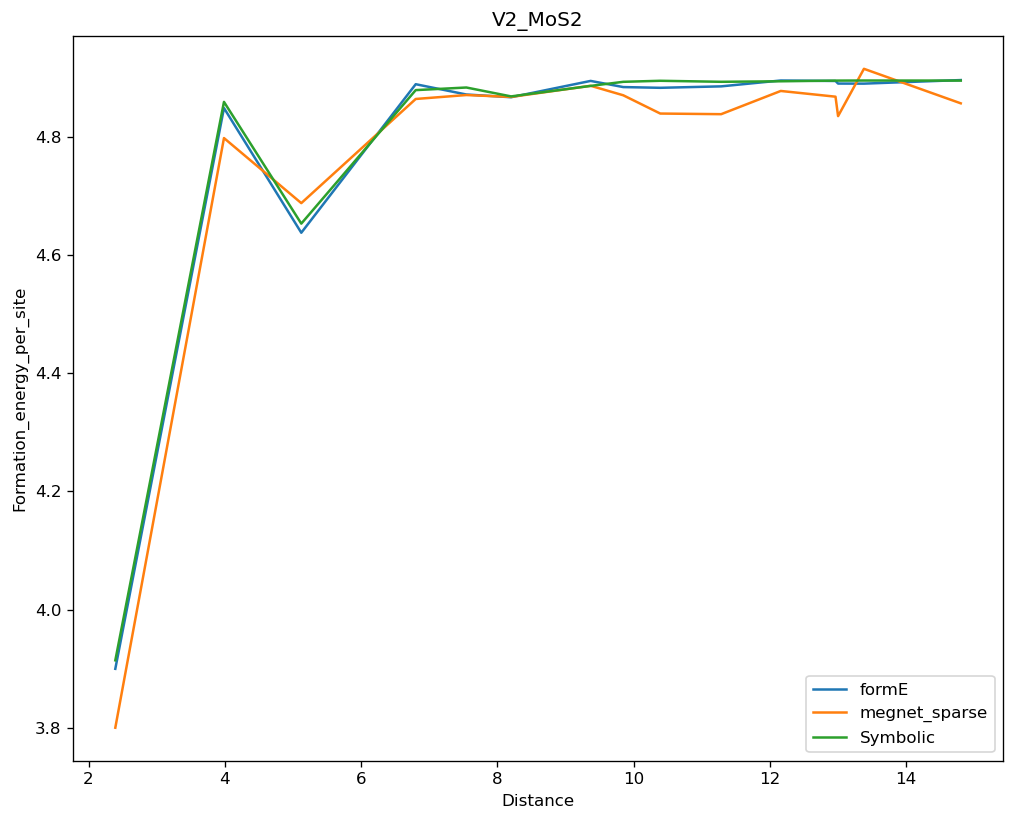

In [18]:

import numpy as np

import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 8), dpi=120)

x = Data['distance'].values


y1 = Data['formE'].values

y2 = Data['megnet_sparse'].values

y3 = Data['megnet'].values

y4 = Data['gemnet'].values

y5 = 4.895091+  (np.cos(0.5) * np.cos((8-2*x)) - 1)* x*x * np.exp(-x)


plt.plot(x,y1,label='formE')

plt.plot(x,y2,label='megnet_sparse')

#plt.plot(x,y3,label='megnet')

#plt.plot(x,y4,label='gemnet')

plt.plot(x,y5,label='Symbolic')

plt.legend(loc='lower right')

ax.set_ylabel('Formation_energy_per_site')

ax.set_xlabel('Distance')

ax.set_title('V2_MoS2')
